In [223]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from matplotlib.animation import PillowWriter

In [224]:
warnings.filterwarnings(action = 'ignore')
plt.style.use('ggplot')
plt.rc('font',family = 'malgun gothic')
plt.rc('axes',unicode_minus = False)

In [225]:
df = pd.read_csv('https://raw.githubusercontent.com/yonghyeun/Dementia_Analysis/main/data/train.csv').drop('EMAIL',axis = 1)

df

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,target
0,1.262897,202.571429,2208.333333,3659.730159,0.793651,615.142857,0.809524,146.428571,18.333333,5.984127,...,75.492063,57.634921,65.253968,78.650794,54.904762,69.730159,0.022222,0.022222,23543.809524,MCI
1,1.370299,217.477876,1773.504425,5084.876106,0.256637,574.619469,0.539823,281.300885,15.398230,1.778761,...,89.345133,83.601770,97.663717,83.973451,74.433628,81.097345,0.057434,0.057434,28060.088496,CN
2,1.390625,259.672414,2365.137931,3877.741379,0.637931,632.482759,0.362069,328.827586,9.068966,4.379310,...,61.517241,63.758621,58.034483,76.965517,64.672414,58.344828,-0.045862,-0.045862,20247.413793,MCI
3,1.442555,401.382353,2503.882353,7250.514706,0.382353,534.470588,0.176471,343.852941,30.970588,3.382353,...,76.867647,55.500000,66.970588,82.500000,38.779412,63.573529,-0.129706,-0.129706,21879.264706,MCI
4,1.388393,271.685714,2114.342857,5053.200000,2.057143,484.085714,0.285714,326.485714,28.285714,8.971429,...,96.542857,66.942857,76.457143,74.800000,20.628571,77.600000,0.237714,0.237714,23275.714286,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1.625822,660.394737,2761.947368,12410.868421,8.710526,499.973684,0.447368,302.868421,78.710526,70.026316,...,68.236842,61.578947,81.684211,75.684211,64.578947,67.973684,-0.050000,-0.050000,22883.684211,CN
137,1.542480,573.781250,2676.125000,10846.750000,5.421875,610.515625,0.609375,283.140625,64.000000,40.562500,...,85.031250,57.468750,42.156250,83.828125,31.234375,51.750000,-0.125469,-0.125469,18961.875000,CN
138,1.257353,200.549020,2206.941176,3377.098039,0.588235,507.117647,0.392157,206.823529,9.176471,4.333333,...,88.882353,72.745098,67.705882,75.529412,82.607843,85.274510,-0.040000,-0.040000,28078.823529,CN
139,1.595274,654.780488,2748.975610,12247.487805,3.121951,473.658537,0.560976,309.951220,84.804878,22.536585,...,99.634146,71.121951,63.146341,85.317073,28.951220,68.634146,-0.037317,-0.037317,23045.121951,MCI


# Cross table 생성하기

In [226]:
activity_cols = ['activity_average_met', 'activity_cal_active', 'activity_cal_total',
       'activity_daily_movement', 'activity_high', 'activity_inactive',
       'activity_inactivity_alerts', 'activity_low', 'activity_medium',
       'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total','target']

sleep_cols = ['sleep_awake', 'sleep_breath_average', 'sleep_deep', 'sleep_duration',
       'sleep_efficiency', 'sleep_hr_average', 'sleep_hr_lowest', 'sleep_light', 
       'sleep_midpoint_at_delta','sleep_midpoint_time', 'sleep_onset_latency', 'sleep_period_id',
       'sleep_rem', 'sleep_restless', 'sleep_rmssd', 'sleep_score',
       'sleep_score_alignment', 'sleep_score_deep', 'sleep_score_disturbances',
       'sleep_score_efficiency', 'sleep_score_latency', 'sleep_score_rem',
       'sleep_score_total', 'sleep_temperature_delta',
       'sleep_temperature_deviation', 'sleep_total','target']

In [227]:
def cross_tab(df):
    
    mean_ctab = round(df.groupby('target').mean(),2).astype(str)
    
    sd_ctab = round(df.groupby('target').std(),2).astype(str)
    
    result = mean_ctab + ' (±' + sd_ctab + ')'
    
    return result.T

In [228]:
activity_ctab = cross_tab(df[activity_cols])
sleep_ctab = cross_tab(df[sleep_cols])

In [229]:
display(activity_ctab)
print('**'* 40)
display(sleep_ctab)

target,CN,Dem,MCI
activity_average_met,1.48 (±0.14),1.41 (±0.29),1.48 (±0.13)
activity_cal_active,475.12 (±200.12),435.43 (±398.84),473.21 (±188.23)
activity_cal_total,2510.12 (±285.74),2469.62 (±476.3),2529.53 (±228.32)
activity_daily_movement,8974.8 (±3811.04),8174.39 (±8037.34),8917.68 (±3733.67)
activity_high,3.41 (±4.94),3.45 (±5.09),2.25 (±2.99)
activity_inactive,517.69 (±89.02),484.6 (±81.51),504.36 (±102.74)
activity_inactivity_alerts,0.48 (±0.38),0.39 (±0.39),0.35 (±0.27)
activity_low,287.89 (±82.15),222.98 (±129.02),303.14 (±85.01)
activity_medium,52.63 (±28.78),49.97 (±50.48),53.05 (±33.87)
activity_met_min_high,24.52 (±40.96),25.46 (±37.09),15.25 (±17.47)


********************************************************************************


target,CN,Dem,MCI
sleep_awake,5346.82 (±1927.4),6953.55 (±3090.25),5917.39 (±1947.26)
sleep_breath_average,16.78 (±1.21),16.77 (±1.26),16.92 (±1.01)
sleep_deep,5317.15 (±2014.97),4117.52 (±1879.24),4858.97 (±2060.07)
sleep_duration,28624.76 (±3930.61),33311.05 (±6196.72),29111.58 (±3549.01)
sleep_efficiency,81.96 (±5.41),80.07 (±6.97),80.3 (±5.72)
sleep_hr_average,60.73 (±6.91),58.95 (±6.5),60.44 (±6.43)
sleep_hr_lowest,55.22 (±6.07),53.16 (±6.36),55.11 (±6.05)
sleep_light,14388.88 (±2648.68),18265.51 (±3625.43),14838.4 (±2749.79)
sleep_midpoint_at_delta,11405.16 (±6793.19),16845.99 (±15629.77),10885.05 (±6443.42)
sleep_midpoint_time,14408.21 (±2104.77),16947.58 (±3260.03),14588.19 (±1764.4)


# 통계적 가설검정

### ANOVA TEST

In [230]:
def anova_test(df):
    
    selector = SelectKBest(score_func = f_classif)
    
    X = df.drop('target',axis = 1)
    Y = df['target']
    
    selector.fit(X,Y)
    
    result = pd.DataFrame({'F-statics':selector.scores_,
                            'p-value':selector.pvalues_}, index = selector.feature_names_in_).sort_values(by = 'p-value')
    
    
    return result 

In [231]:
activity_anova = anova_test(df[activity_cols])
sleep_anova = anova_test(df[sleep_cols])

In [232]:
def merge_ctab_anova(ctab,anova):
    
    result = pd.merge(ctab,anova,left_index = True, right_index = True).sort_values(by = 'p-value')
    
    result = result[['CN','MCI','Dem','F-statics','p-value']]
    
    return result

In [233]:
activity_result = merge_ctab_anova(activity_ctab,activity_anova)
sleep_result = merge_ctab_anova(sleep_ctab,sleep_anova)

In [234]:
display(activity_result)
print('**'*50)
display(sleep_result)

,CN,MCI,Dem,F-statics,p-value
activity_rest,524.05 (±89.87),524.05 (±70.79),627.0 (±143.23),5.741660,0.004025
activity_score_meet_daily_targets,77.58 (±25.02),78.44 (±22.11),49.94 (±35.61),5.343229,0.005820
activity_score,83.06 (±9.77),84.28 (±9.78),74.81 (±15.34),3.283238,0.040457
activity_low,287.89 (±82.15),303.14 (±85.01),222.98 (±129.02),3.255877,0.041528
activity_total,343.93 (±97.25),358.44 (±101.1),276.41 (±175.24),2.325390,0.101564
activity_score_training_volume,87.76 (±15.86),88.46 (±15.24),76.21 (±30.16),2.096684,0.126760
activity_inactivity_alerts,0.48 (±0.38),0.35 (±0.27),0.39 (±0.39),2.067916,0.130350
activity_score_move_every_hour,95.84 (±4.61),97.26 (±2.75),96.97 (±3.67),1.974946,0.142671
activity_met_min_inactive,7.74 (±2.41),8.15 (±2.57),6.58 (±2.09),1.617783,0.202077
activity_met_min_low,197.58 (±68.59),204.63 (±64.67),161.86 (±135.67),1.297965,0.276400


****************************************************************************************************


,CN,MCI,Dem,F-statics,p-value
sleep_light,14388.88 (±2648.68),14838.4 (±2749.79),18265.51 (±3625.43),8.109468,0.000468
sleep_score_latency,79.97 (±3.56),79.97 (±3.66),75.0 (±6.82),6.978214,0.001297
sleep_midpoint_time,14408.21 (±2104.77),14588.19 (±1764.4),16947.58 (±3260.03),6.045995,0.003041
sleep_duration,28624.76 (±3930.61),29111.58 (±3549.01),33311.05 (±6196.72),5.647111,0.004392
sleep_onset_latency,709.08 (±195.78),691.17 (±188.15),930.25 (±454.55),4.733216,0.010276
sleep_restless,35.99 (±9.41),37.2 (±9.84),45.51 (±9.19),4.062767,0.019300
sleep_score_alignment,89.39 (±11.41),93.85 (±6.18),86.06 (±16.01),3.780940,0.025198
sleep_total,23277.95 (±3294.7),23194.2 (±3162.02),26357.5 (±4686.18),3.641765,0.028756
sleep_score_deep,83.42 (±17.51),79.8 (±16.93),68.2 (±21.19),3.300261,0.039805
sleep_awake,5346.82 (±1927.4),5917.39 (±1947.26),6953.55 (±3090.25),3.242545,0.042060


<aside>
💡 INSIGHT

1. 세 그룹간 유의미한 차이가 있던 변수는 다음과 같았습니다.

- 하루 휴식 시간
- 활동 목표 달성 점수
- 활동 점수
- 저강도 운동 시간

2. 비 치매군 (CN) 과 경도 인지 장애군(MCI)의 독립 변수간의 차이는 크게 나지 않았습니다. 위 4가지의 변수들은 치매군(Dem) 와 다른 환자 군간 차이가 유의미하게 나타났습니다.

 MCI 군과 Dem 군을 합쳐 하나의 치매 군으로 보고 T-test 검정을 시행한다면 유의미한 차이가 나는 변수들은 달라질 것 같습니다.

 두 변수를 합쳐야 할지 말아야 할지 고민을 해봐야겠습니다.

</aside>

<aside>
💡 INSIGHT

1. 세 그룹간 유의미한 차이가 있던 변수는 다음과 같았습니다.

- 가벼운 수면 시간
- 수면 잠복 점수
- 수면 중간점 시간
- 수면 시간 
- 수면 잠복 시간 
- 뒤척임 비율
- 수면 시기 점수 
- 수면 시간 
- 깊은 수면 점수 
- 깬 시간

2. 수면 양상 데이터에서는 활동 내역 데이터와 다르게 세 그룹간의 차이가 나타났습니다.
대부분 부정적인 양상은 Dem → MCI → CN 군, 긍정적인 양상은 CN →MCI → Dem 순으로 나타났습니다. 

 하지만 anova test 에서는 각 그룹 간의 차이가 있다 정도만 알 수 있을 뿐 제대로 된 통계 검정을 위해서는 다른 절차가 필요 할 것입니다.

</aside>

In [235]:
activity_pvalue = activity_result[activity_result['p-value'] < 0.05]
sleep_pvalue = sleep_result[sleep_result['p-value'] < 0.05]

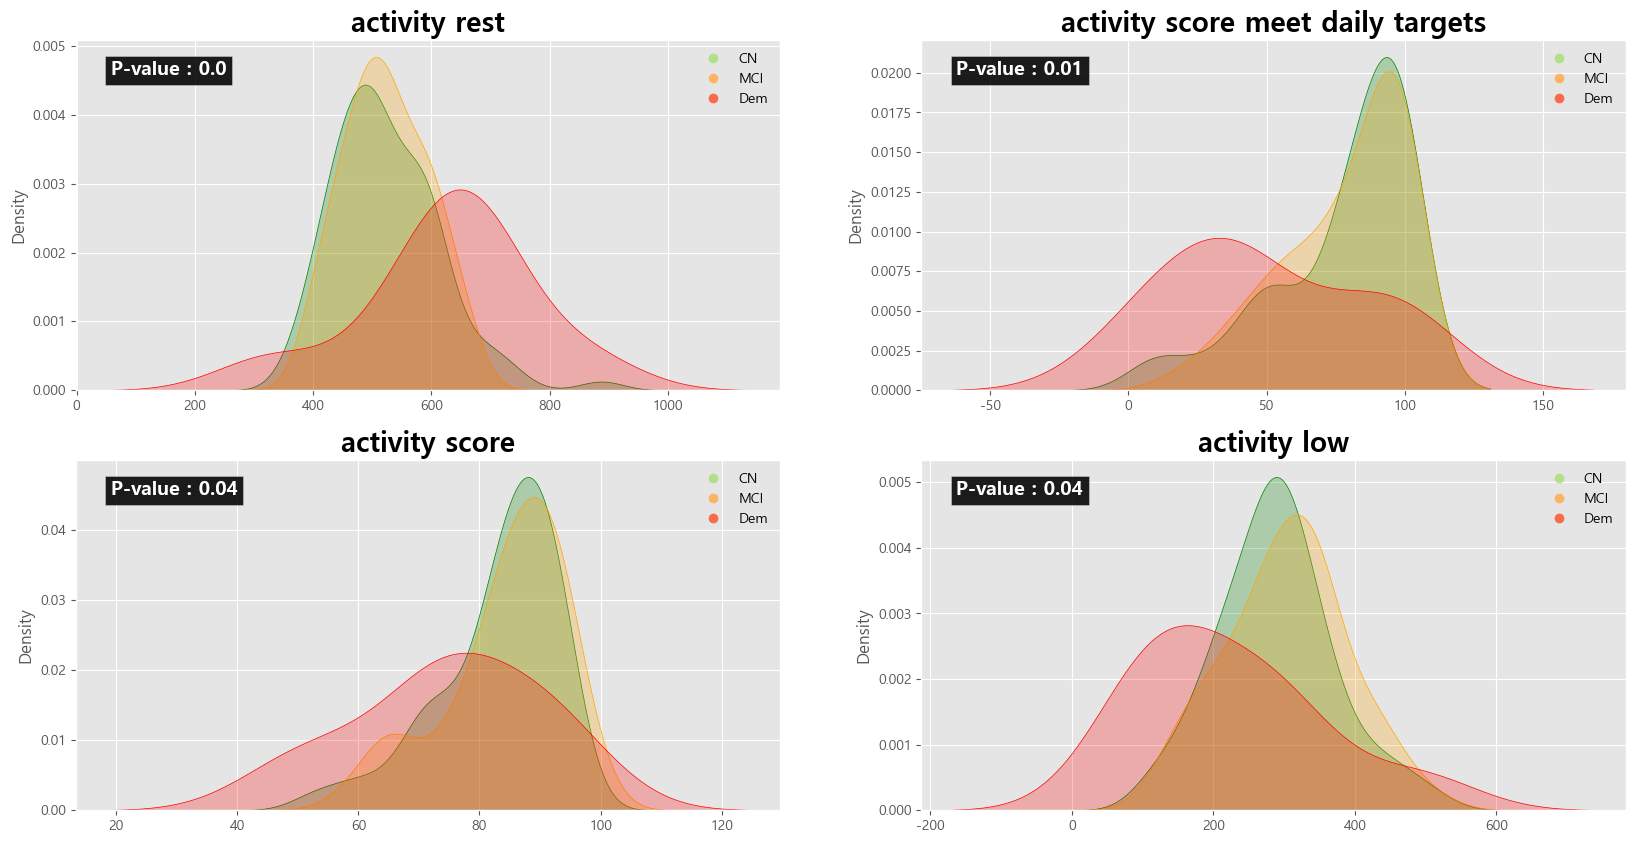

In [236]:
fig,ax = plt.subplots(ncols = 2,nrows = 2, figsize = (20,10))

target_colors = {'CN':'#b2df8a','MCI':'#fdb462','Dem':'#fb6a4a'}

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                        for label, color in target_colors.items()]

ax = ax.flatten()

colors = ['green','orange','red']

p_value = activity_pvalue['p-value'].values

for i,col in enumerate(activity_pvalue.index):
    for num,target in enumerate(['CN','MCI','Dem']):
        
        p = round(p_value[i],2)
        
        sns.kdeplot(data = df[df['target'] == target],
                    x = col,
                    ax = ax[i],
                    fill = True,
                    color = colors[num])
        ax[i].set_xlabel('')
        ax[i].set_title(col.replace('_',' '), fontsize = 20, weight = 'bold')
        ax[i].legend(handles = legend_elements,
                    frameon = False,
                    loc = 'upper right')
        # add text to ax
        ax[i].text(0.05, 0.9, f'P-value : {p}', transform=ax[i].transAxes, fontsize=14, fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.5))

<aside>
💡 INSIGHT

 **치매군 환자**들이 **비 치매군**과 **경도 인지 장애군**에 비해 휴식 시간이 많았고, 하루 활동 점수 및 저강도 운동 시간이 매우 낮았습니다.

 **비 치매군**과 **경도 인지 장애군**간의 평균적인 차이는 보이지 않습니다.

</aside>

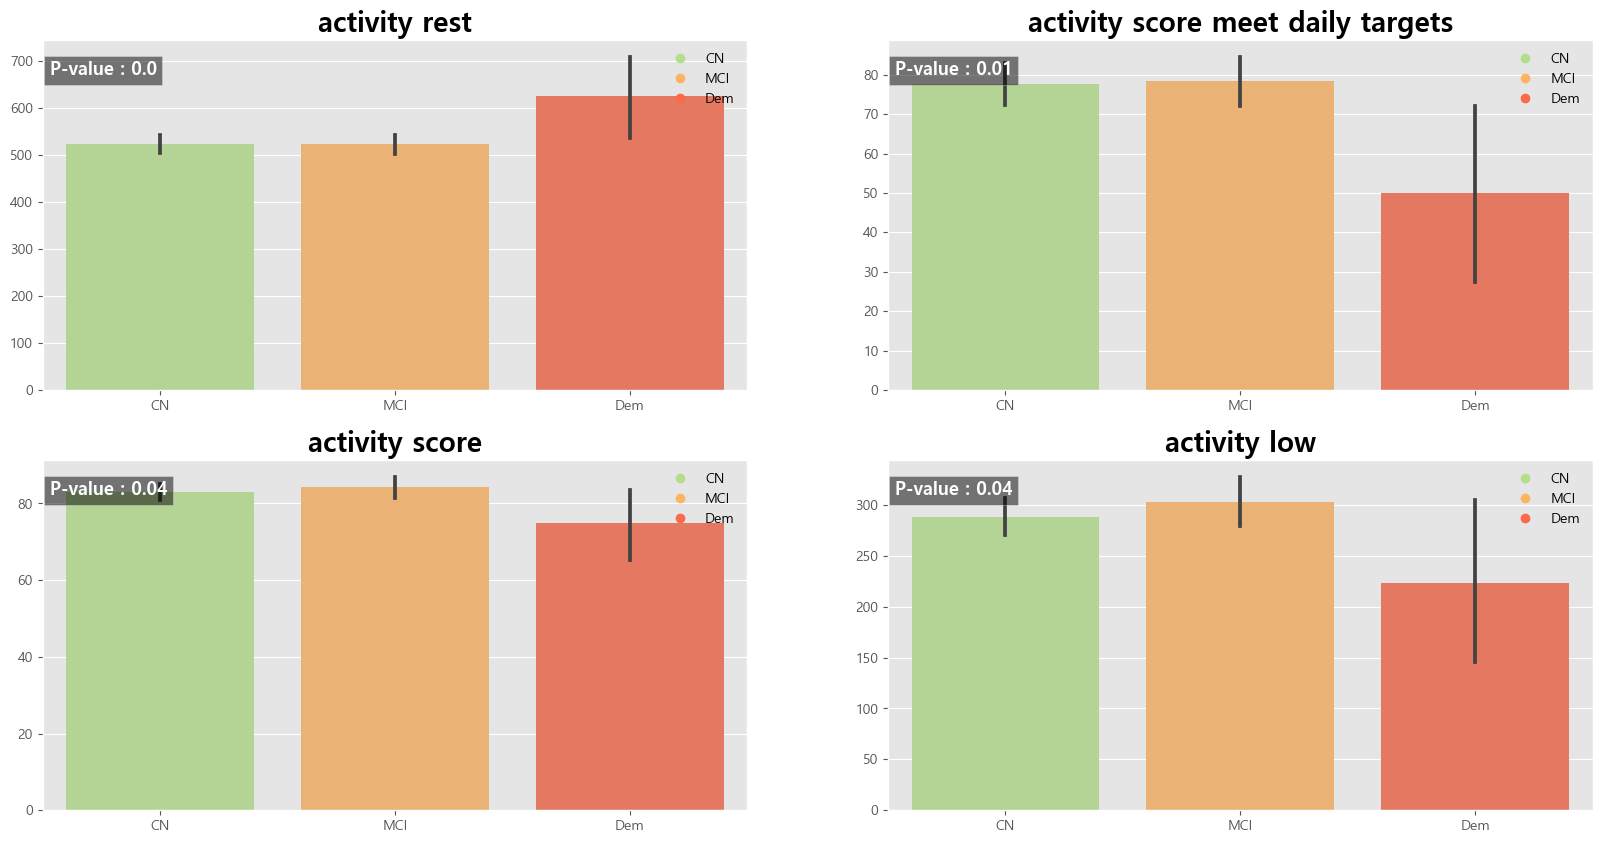

In [237]:
fig,ax = plt.subplots(ncols = 2,nrows = 2, figsize = (20,10))

target_colors = {'CN':'#b2df8a','MCI':'#fdb462','Dem':'#fb6a4a'}

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                        for label, color in target_colors.items()]

ax = ax.flatten()

colors = ['#b2df8a','#fdb462','#fb6a4a']

p_value = activity_pvalue['p-value'].values

for i,col in enumerate(activity_pvalue.index):
        
    p = round(p_value[i],2)
    
    sns.barplot(data = df,
                x = 'target',
                y = col,
                ax = ax[i],
                order = ['CN','MCI','Dem'],
                palette = ['#b2df8a','#fdb462','#fb6a4a'])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(col.replace('_',' '), fontsize = 20, weight = 'bold')
    ax[i].legend(handles = legend_elements,
                frameon = False,
                loc = 'upper right')
    ax[i].text(0.01, 0.9, f'P-value : {p}', transform=ax[i].transAxes, fontsize=13, fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.5))

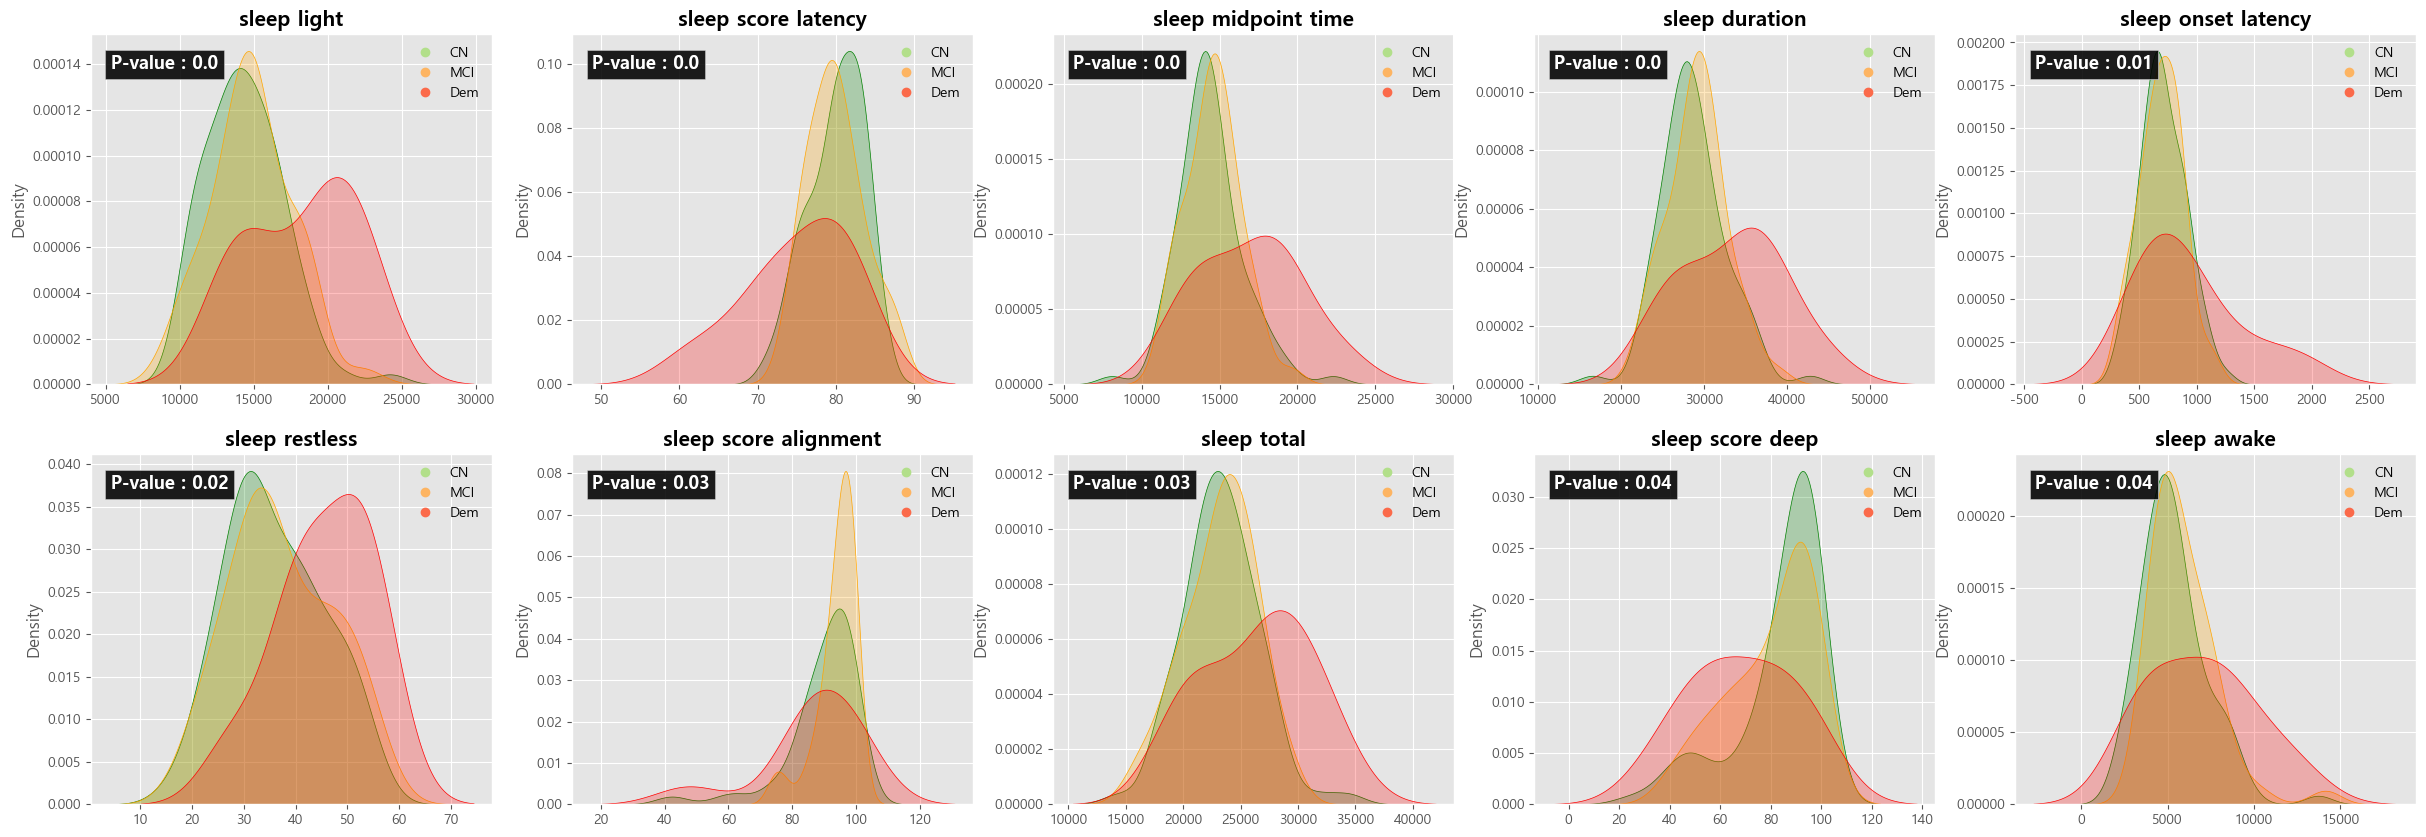

In [238]:
fig,ax = plt.subplots(ncols = 5,nrows = 2, figsize = (30,10))

target_colors = {'CN':'#b2df8a','MCI':'#fdb462','Dem':'#fb6a4a'}

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                        for label, color in target_colors.items()]

ax = ax.flatten()

colors = ['green','orange','red']


p_value = sleep_pvalue['p-value'].values

for i,col in enumerate(sleep_pvalue.index):
    for num,target in enumerate(['CN','MCI','Dem']):
        
        p = round(p_value[i],2)
        
        sns.kdeplot(data = df[df['target'] == target],
                    x = col,
                    ax = ax[i],
                    fill = True,
                    color = colors[num])
        ax[i].set_xlabel('')
        ax[i].set_title(col.replace('_',' '), fontsize = 15, weight = 'bold')
        ax[i].legend(handles = legend_elements,
                    frameon = False,
                    loc = 'upper right')
        # add text to ax
        ax[i].text(0.05, 0.9, f'P-value : {p}', transform=ax[i].transAxes, fontsize=13, fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.5))

<aside>
💡 INSIGHT




**치매군 환자**가 **비 치매군**과 **경도 인지 장애군**에 비해 수면의 양과 관련된 요소들이 높았습니다. 

하지만 수면의 질과 연관된 변수들에 있어서는 (깊은 수면, 수면 점수 등) **비 치매군**에 비해 **치매군 환자**와 **경도 인지 장애군**이 ****낮은 양상을 보였습니다. 그 중 **치매군 환자**가 가장 낮았습니다.

</aside>

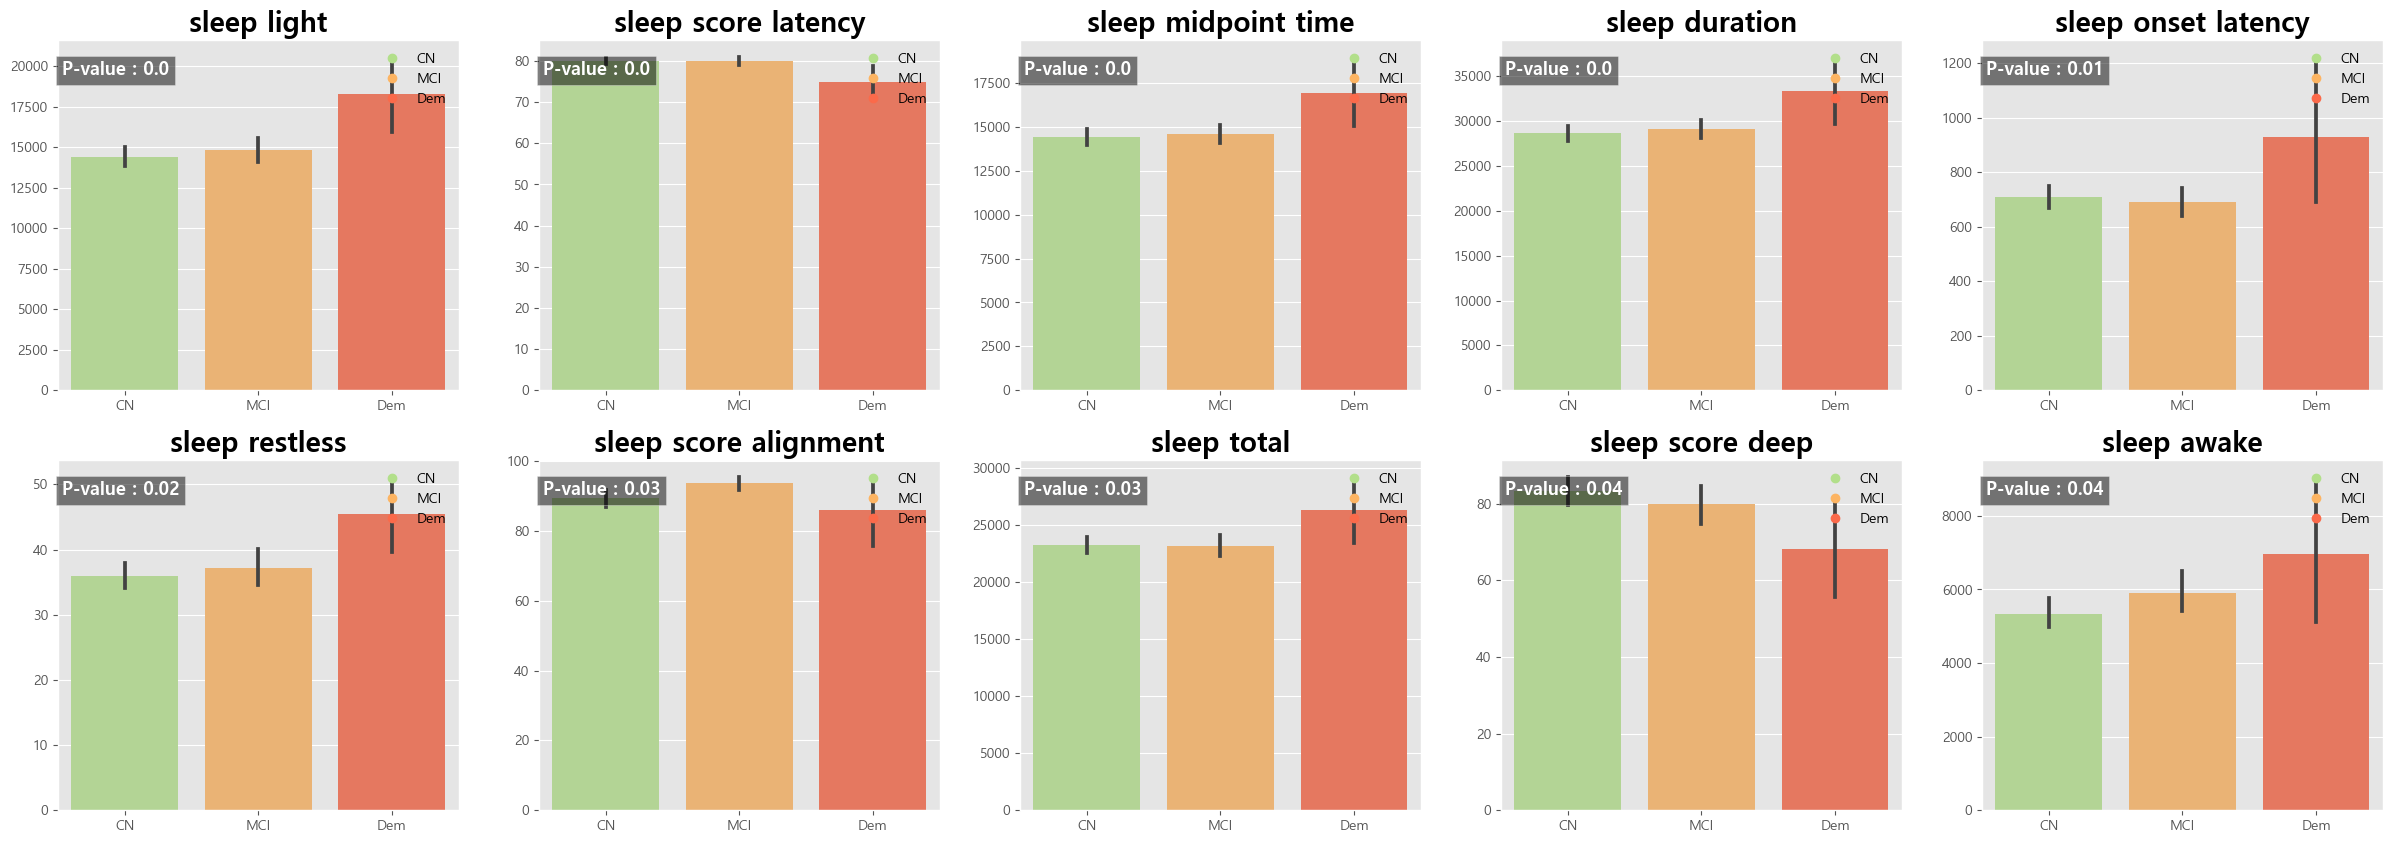

In [239]:
fig,ax = plt.subplots(ncols = 5,nrows = 2, figsize = (30,10))

target_colors = {'CN':'#b2df8a','MCI':'#fdb462','Dem':'#fb6a4a'}

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                        for label, color in target_colors.items()]

ax = ax.flatten()

colors = ['#b2df8a','#fdb462','#fb6a4a']

p_value = sleep_pvalue['p-value'].values

for i,col in enumerate(sleep_pvalue.index):
        
    p = round(p_value[i],2)
    
    sns.barplot(data = df,
                x = 'target',
                y = col,
                ax = ax[i],
                order = ['CN','MCI','Dem'],
                palette = ['#b2df8a','#fdb462','#fb6a4a'])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(col.replace('_',' '), fontsize = 20, weight = 'bold')
    ax[i].legend(handles = legend_elements,
                frameon = False,
                loc = 'upper right')
    ax[i].text(0.01, 0.9, f'P-value : {p}', transform=ax[i].transAxes, fontsize=13, fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.5))

# Correlationship

In [240]:
activity_corr = df[activity_cols].corr()

sleep_corr = df[sleep_cols].corr()

In [241]:
activity_mask = np.triu(np.ones_like(activity_corr))

sleep_mask = np.triu(np.ones_like(sleep_corr))

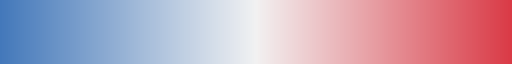

In [242]:
cmap = sns.diverging_palette(250,10, as_cmap = True) # 상관관계표에 사용할 cmap 객체 생성

cmap

In [243]:
bound = np.array(np.arange(-1,1,0.2))

norm = mpl.colors.BoundaryNorm(bound,ncolors = cmap.N) # cmap 의 경계 생성 

Text(0.5, 1.0, '활동내역 데이터 상관관계 히트맵')

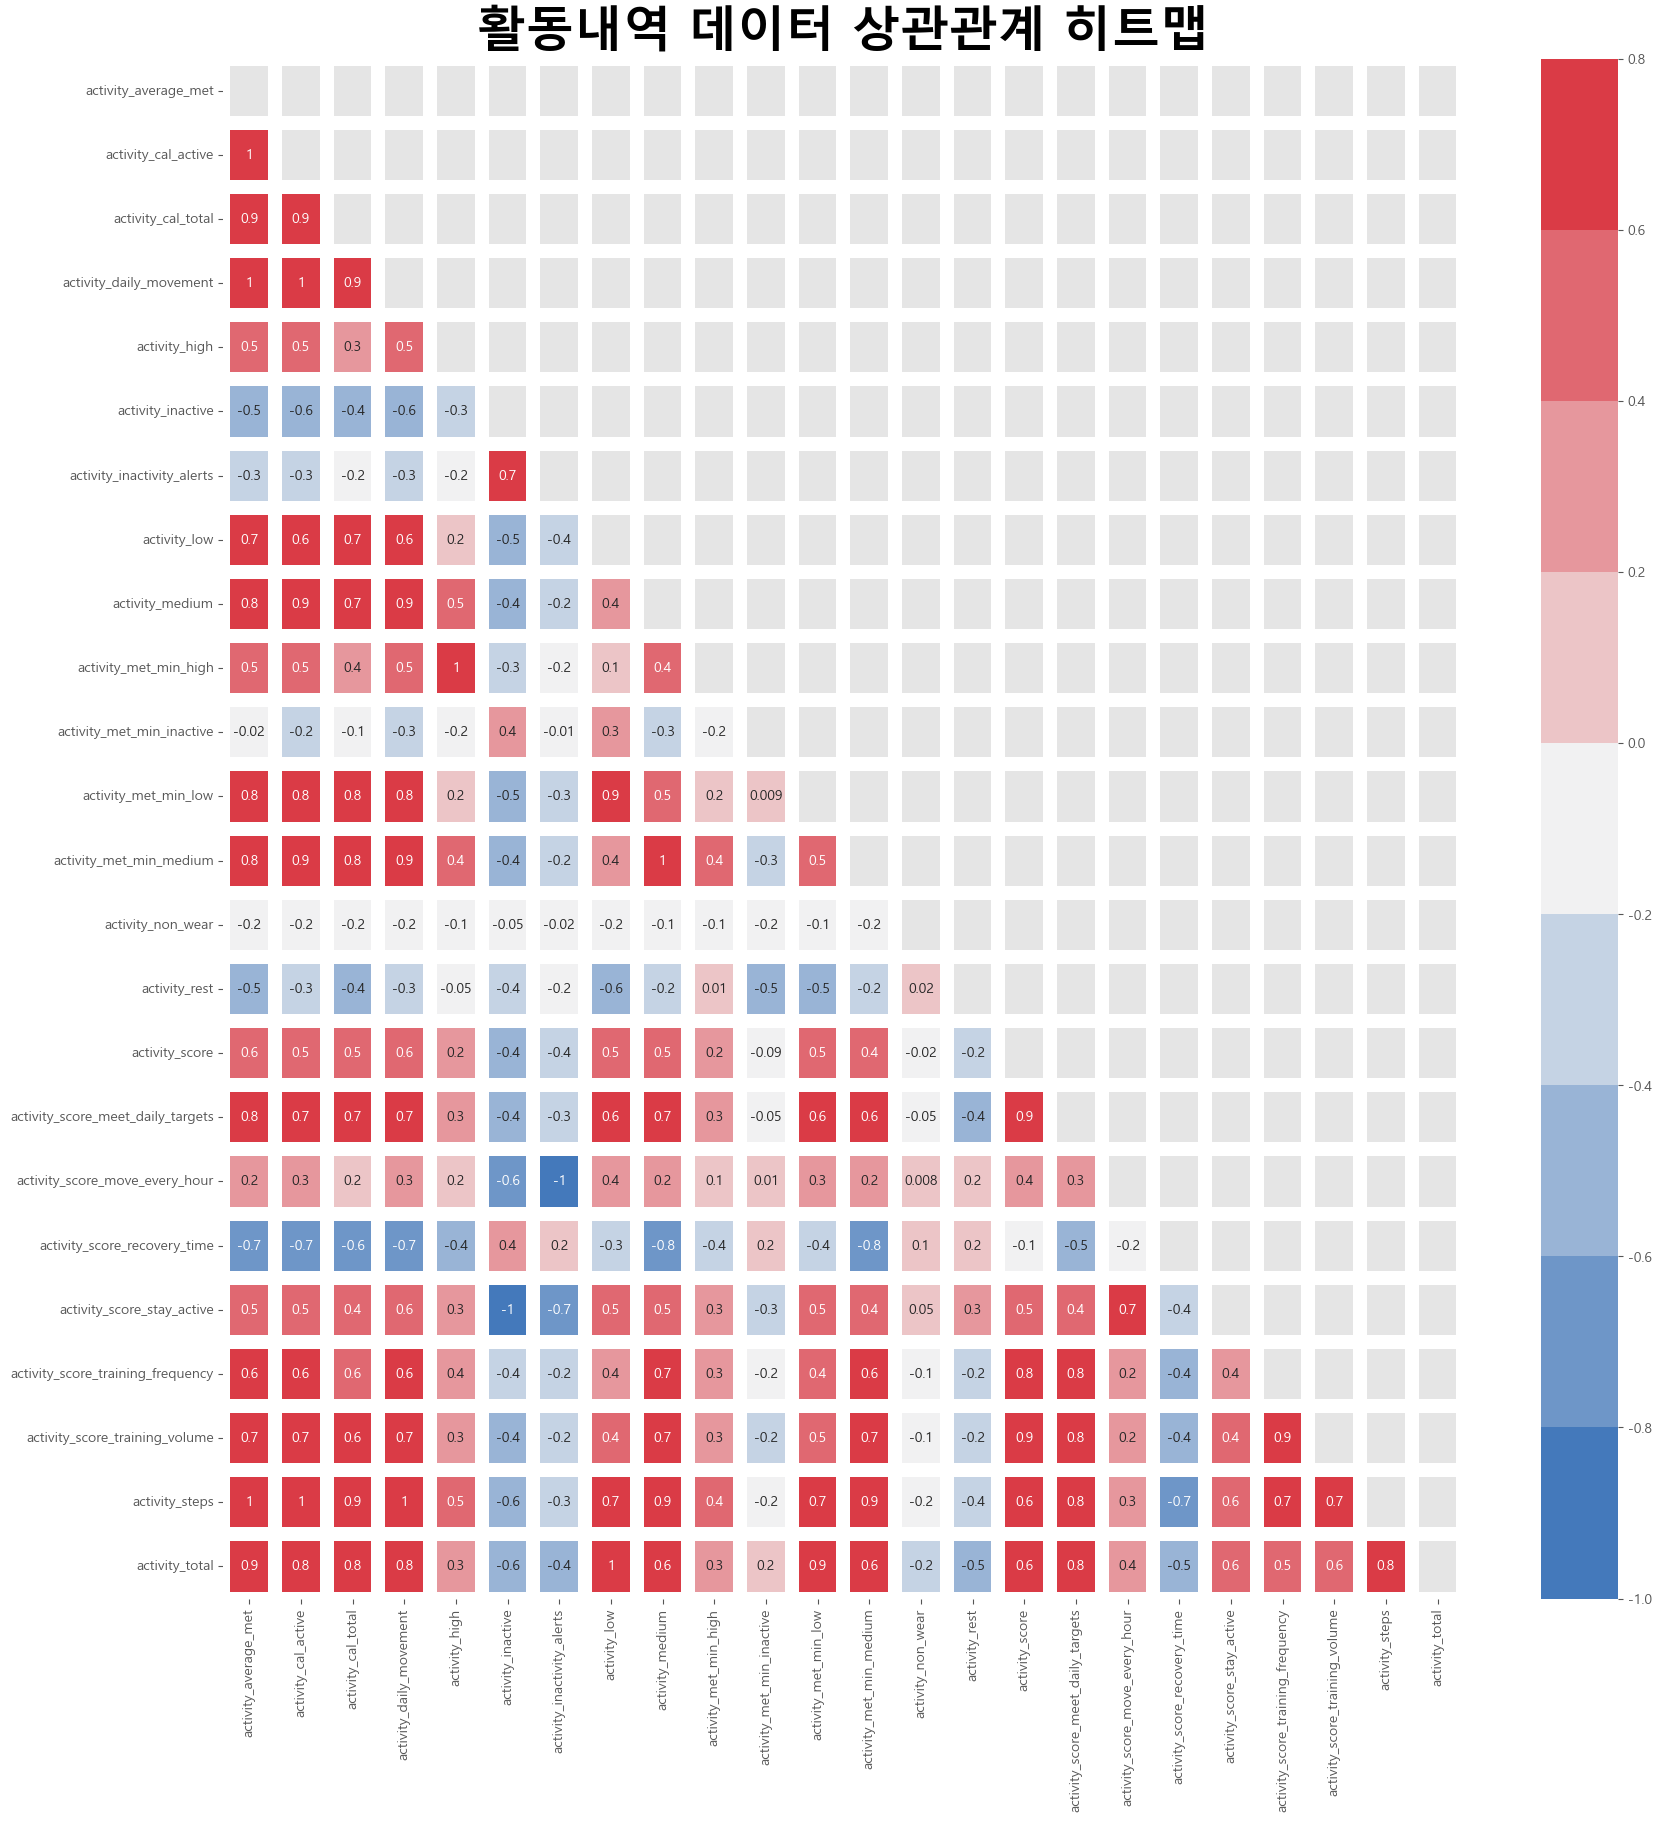

In [244]:
plt.figure(figsize = (20,20))
sns.heatmap(activity_corr,cmap = cmap, norm = norm, annot = True,mask = activity_mask,
            linewidths = 10, fmt = '.1g')
plt.title('활동내역 데이터 상관관계 히트맵',fontsize = 35, fontdict = {'fontstyle':'italic','weight':'bold'})

<aside>
💡 INSIGHT

대부분의 독립 변수간 상관관계를 보이고 있는 경우가 많습니다. (activity non waer 제외)

 이는 같은 내용을 표현하는 평가 지표들이 중복되어 나타남에 나타나는 현상 같습니다.
현재 데이터에서는 활동내역을 시간으로 평가하거나 , MET 로 평가하거나, score 로 평가 하고 있습니다. 

 또한 긍정과 부정을 모두 표현하는 변수들이 존재함에 따라 상관관계가 -0.9 이하로 나타나는 경우도 잦습니다. 예를 들어 하루 활동량과 하루 비활동량과 같은 변수를 뜻합니다.

 적절한 feature enginearing 이 필요해보입니다.

</aside>

Text(0.5, 1.0, '수면 내역 데이터 상관관계 히트맵')

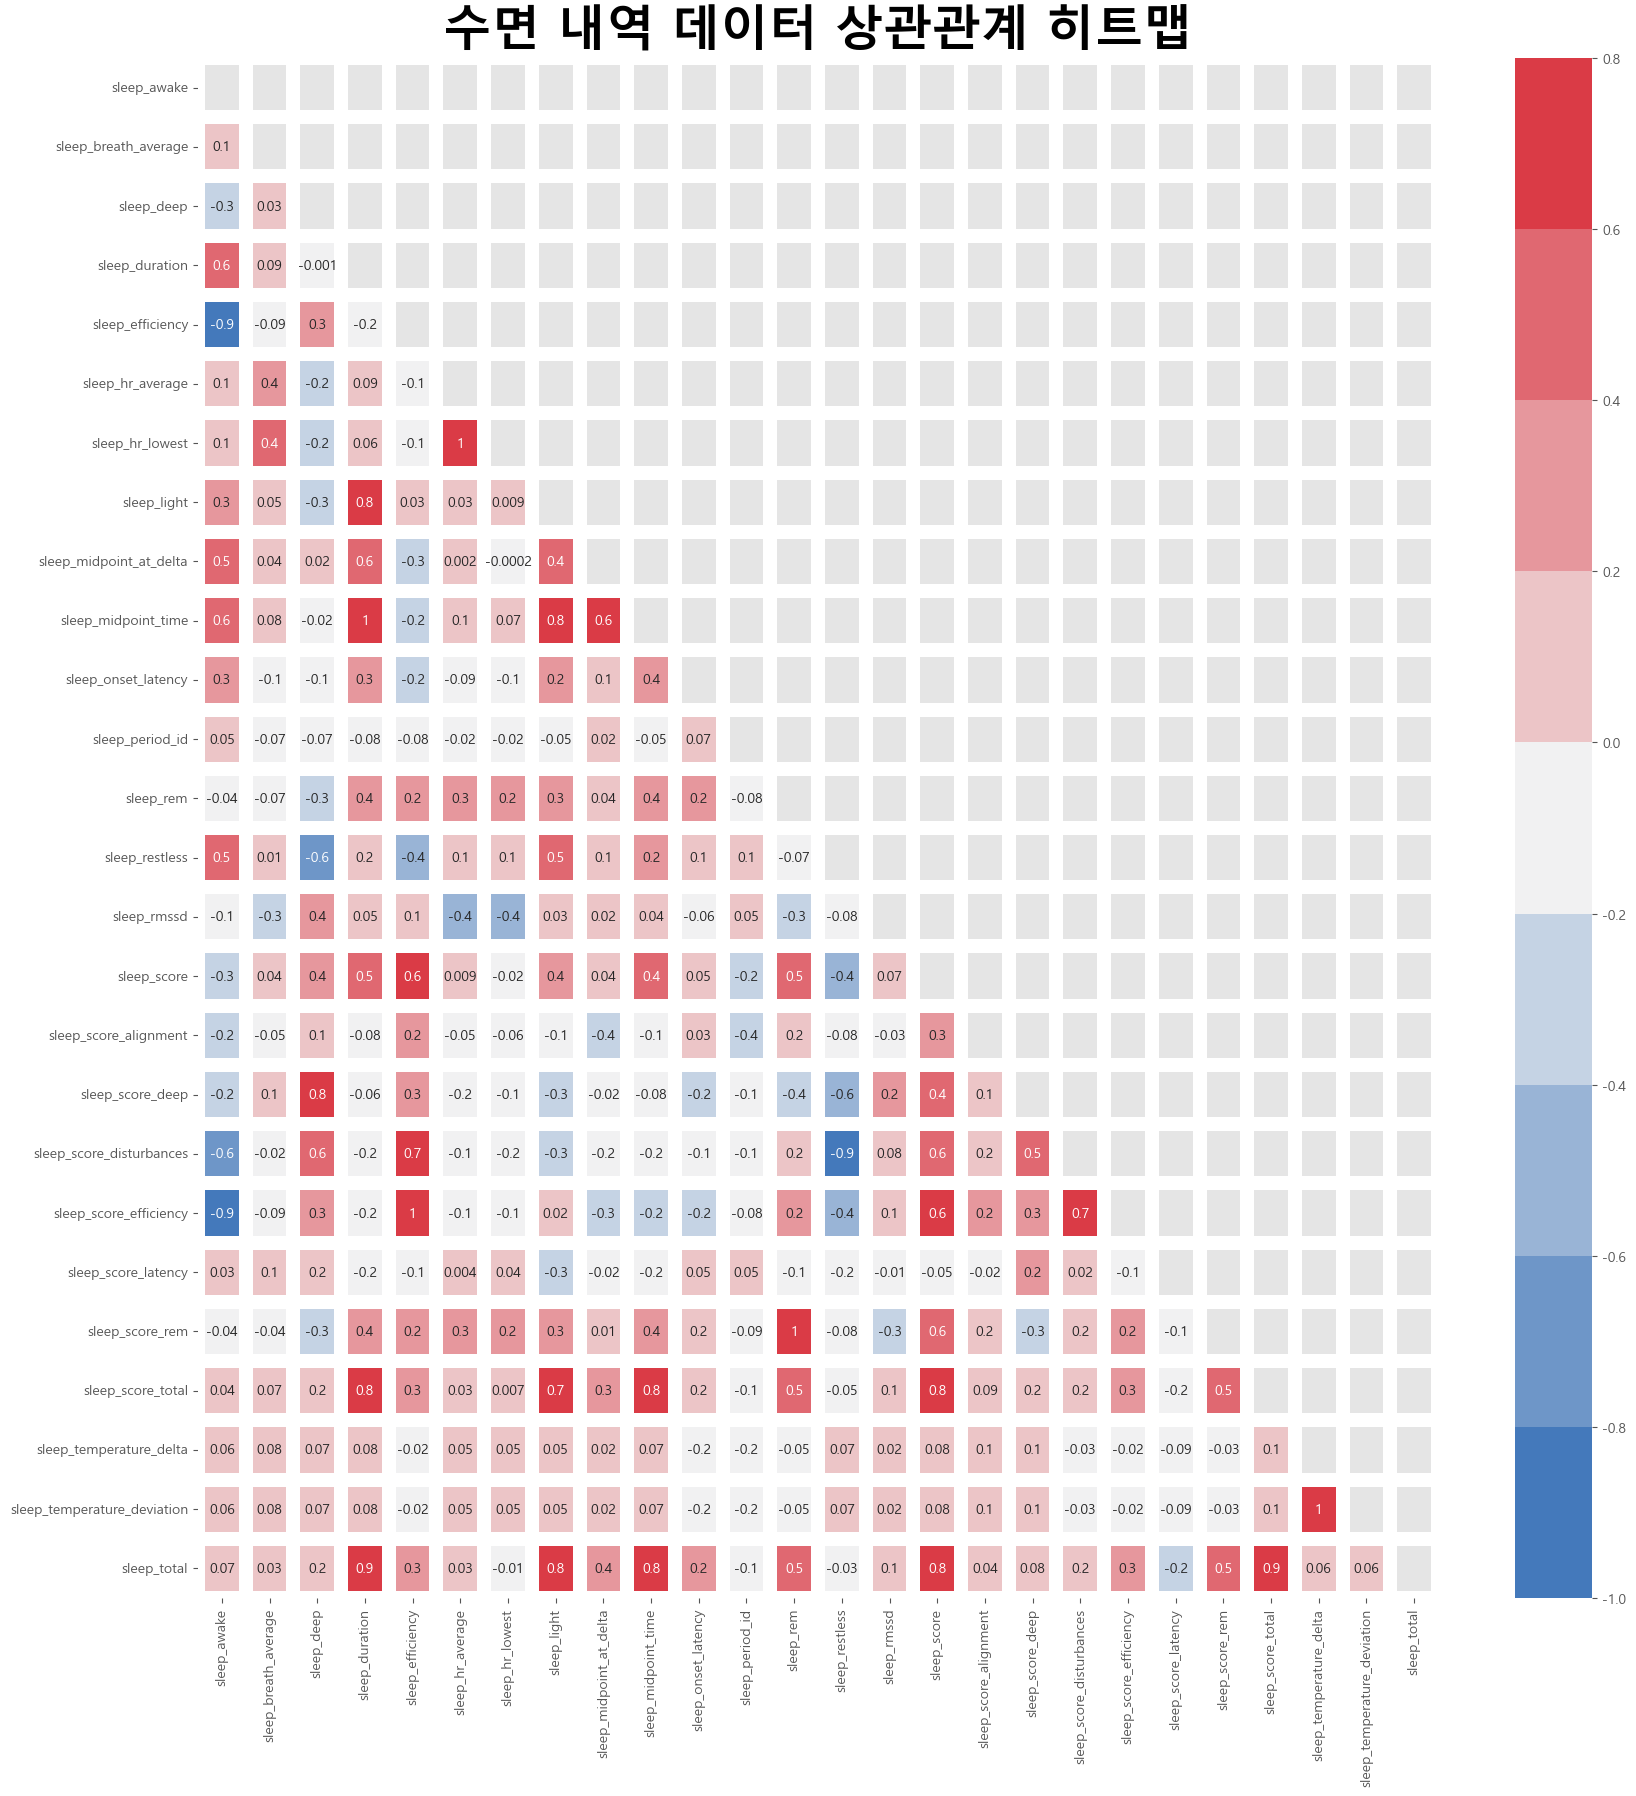

In [245]:
plt.figure(figsize = (20,20))
sns.heatmap(sleep_corr,cmap = cmap, norm = norm, annot = True,mask = sleep_mask,
            linewidths = 10, fmt = '.1g')
plt.title('수면 내역 데이터 상관관계 히트맵',fontsize = 35, fontdict = {'fontstyle':'italic','weight':'bold'})

<aside>
💡 INSIGHT

활동 내역 데이터와 다르게 상관관계가 강한 데이터들이 많지 않습니다.

0.8 이상의 매우 강한 상관 관계를 보이는 변수를 살펴보면 
1. 기상시간과 수면 효율성이 -0.9 로 매우 강한 음의 상관관계를 보입니다.
2. 수면 안정성과 수면 중 뒤척임 점수가 -0.9로 매우 강한 음의 상관 관계를 보입니다.
3. 수면 점수와 수면 중 뒤척임 정도가 -0.8로 매우 강한 음의 상관 관계를 보입니다.
4. 가벼운 수면 시간과 수면 중간점 시간이 0.8 로 매우 강한 양의 상관 관계를 보입니다.

수면과 관련된 독립 변수들간에서도 독립 변수의 조합으로 이뤄진 변수들이 많습니다.
이 또한 feature engiearing 의 필요성이 느껴집니다.

</aside>

# PCA

In [246]:
def do_pca(df, components, make_plot = True):
    
    pca = PCA(n_components = components) 
    
    X = df.drop('target',axis = 1)
    Y = df['target']
    
    pca_df = pd.DataFrame(pca.fit_transform(X))
    
    pca_df['target'] = Y
    
    
    if make_plot == True:
    
        target_colors = {'CN':'green', 'MCI':'orange','Dem':'red'}
        
        cmap = Y.map(target_colors)
        
        legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                        for label, color in target_colors.items()]
        
        if components == 2:
            
            fig, ax = plt.subplots()
            
            ax.scatter(pca_df[0],pca_df[1], color = cmap)
            ax.set_xticks([])
            ax.set_yticks([])
            
            
            ax.legend(handles = legend_elements,
                    frameon = True,
                    facecolor = 'white',
                    loc = 'upper right'
                    )
            
            fig.set_facecolor('black')
            
            
        if components == 3:
            
            fig,ax = plt.subplots(ncols = 3,
                                    figsize = (20,5),
                                    subplot_kw = {'projection':'3d'})
            
            view = [10,45,75]
            
            for i in range(3):
                
                ax[i].scatter(pca_df[0],pca_df[1],pca_df[2],color = cmap)
                ax[i].set_xticks([])
                ax[i].set_yticks([])
                ax[i].set_zticks([])
                ax[i].view_init(10,view[i])
                
                ax[i].set_facecolor('black')
                
            fig.set_facecolor('black')
            
            fig.legend(handles = legend_elements,
                    frameon = True,
                    facecolor = 'white',
                    bbox_to_anchor = (1,1),
                    )
            

    return pca_df
    

### 모든 변수를 고려한 차원 축소 결과

Text(0.5, 1.0, '차원 축소 후 살펴보는 데이터 패턴')

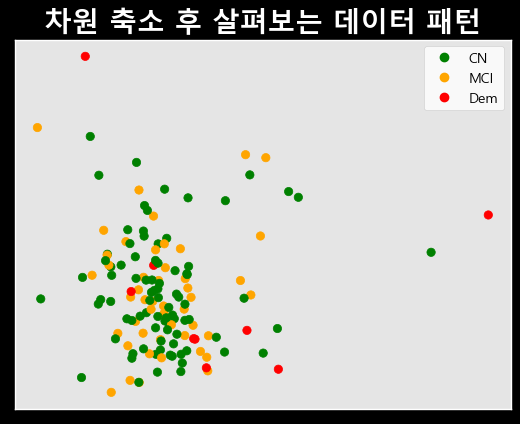

In [247]:
do_pca(df,2)
plt.title('차원 축소 후 살펴보는 데이터 패턴', color = 'white', fontsize = 20,weight = 'bold')

Text(0.5, 0.98, '모든 변수를 고려하여 차원 축소 후 살펴보는 데이터 패턴')

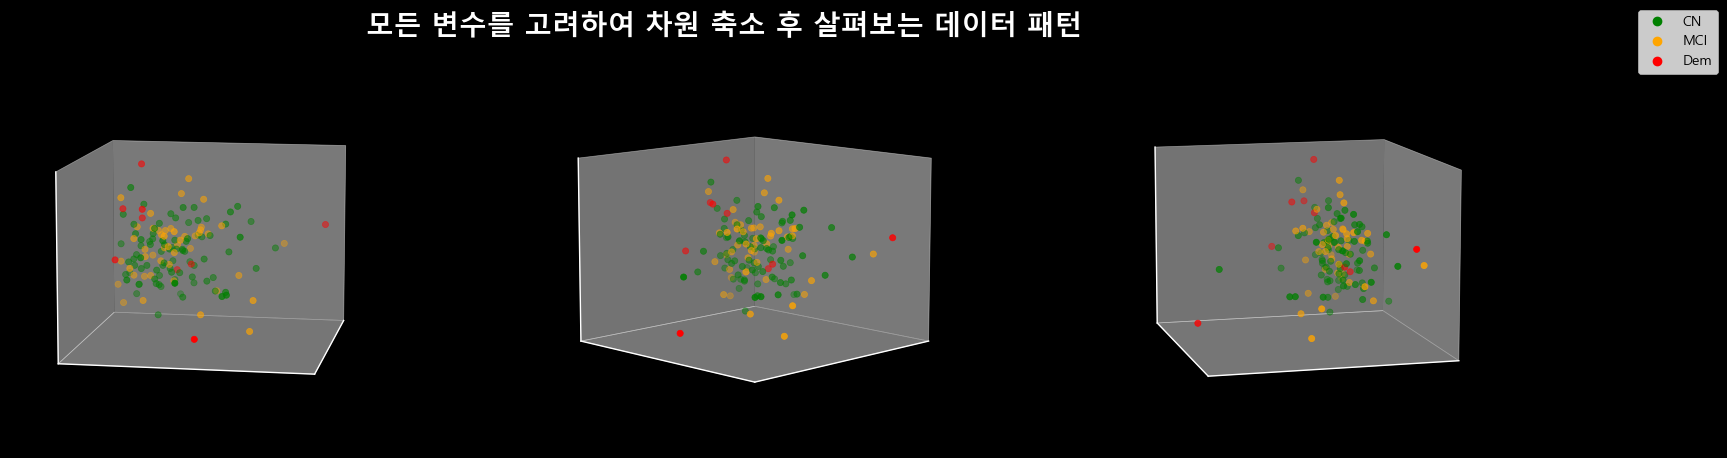

In [248]:
do_pca(df,3)
plt.suptitle('모든 변수를 고려하여 차원 축소 후 살펴보는 데이터 패턴', color = 'white', fontsize = 20,weight = 'bold')

<aside>
💡 INSIGHT

1. **비 치매군**과 **경도 인지 장애** 간 데이터가 패턴이 유사하게 보이는 것만 같습니다.가끔 두 클래스끼리 밀집된 지역이 있기도 하지만 대부분의 영역을 살펴 보았을 때 각 클래스 간 밀집되어 있는 모습을 볼 수 있습니다.
2. **치매군**은 이상치처럼 멀리 나와있는 경우가 많습니다. 중앙에 분포 된 두 개의 치매 군을 제외하고 말입니다.

</aside>

In [249]:
activity_anova_cols = activity_anova[activity_anova['p-value'] < 0.05].index.tolist()
sleep_anova_cols = sleep_anova[sleep_anova['p-value'] < 0.05].index.tolist()

full_anova = activity_anova_cols + sleep_anova_cols + ['target']

print(full_anova)

['activity_rest', 'activity_score_meet_daily_targets', 'activity_score', 'activity_low', 'sleep_light', 'sleep_score_latency', 'sleep_midpoint_time', 'sleep_duration', 'sleep_onset_latency', 'sleep_restless', 'sleep_score_alignment', 'sleep_total', 'sleep_score_deep', 'sleep_awake', 'target']


Text(0.5, 1.0, '차원 축소 후 살펴보는 데이터 패턴')

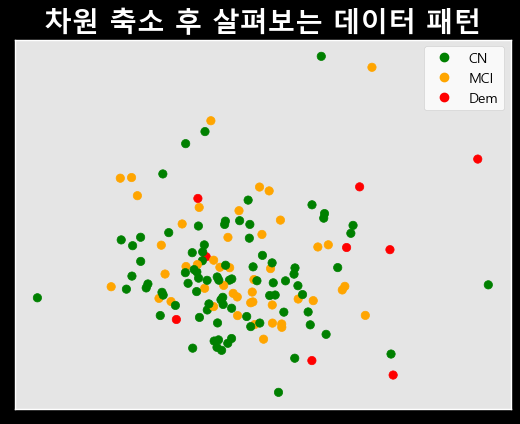

In [250]:
do_pca(df[full_anova],2)
plt.title('차원 축소 후 살펴보는 데이터 패턴', color = 'white', fontsize = 20,weight = 'bold')

Text(0.5, 0.98, '변수 선택 후 차원 축소 후 살펴보는 데이터 패턴')

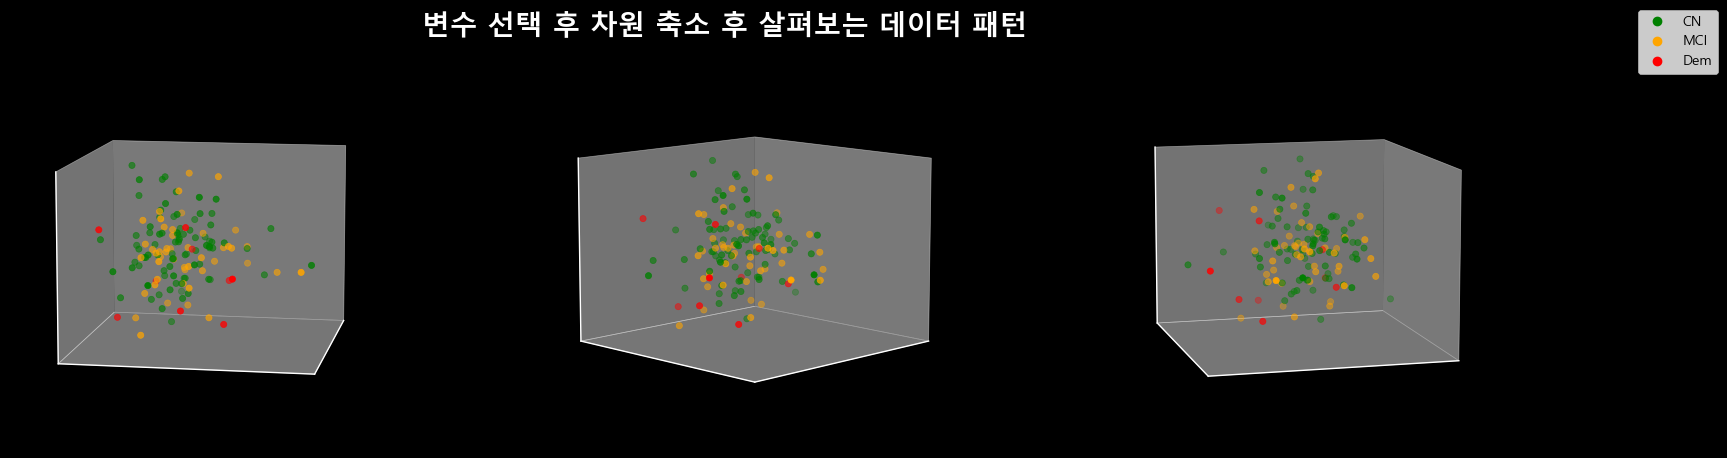

In [251]:
do_pca(df[full_anova],3)
plt.suptitle('변수 선택 후 차원 축소 후 살펴보는 데이터 패턴', color = 'white', fontsize = 20,weight = 'bold')

<aside>
💡 INSIGHT

1. **비 치매군**과 **경도 인지 장애** 간의 데이터 패턴의 차이가 조금 더 명확하게 드러나는 것 같습니다. 이 전 PCA 결과와 비교해보았을 때에 비해 **비 치매군**과 **경도 인지 장애군**의 거리가 조금 더 멀어졌습니다.
2. **치매군**은 변수 선택 전에 비해 더욱 눈에 띄게 이상치처럼 나와 있는 모습을 볼 수 있습니다.

</aside>

### 차원 축소 데이터 GIF 로 저장하기 

In [252]:
full_pca = do_pca(df,3,make_plot = False)
anova_pca = do_pca(df[full_anova],3,make_plot = False)

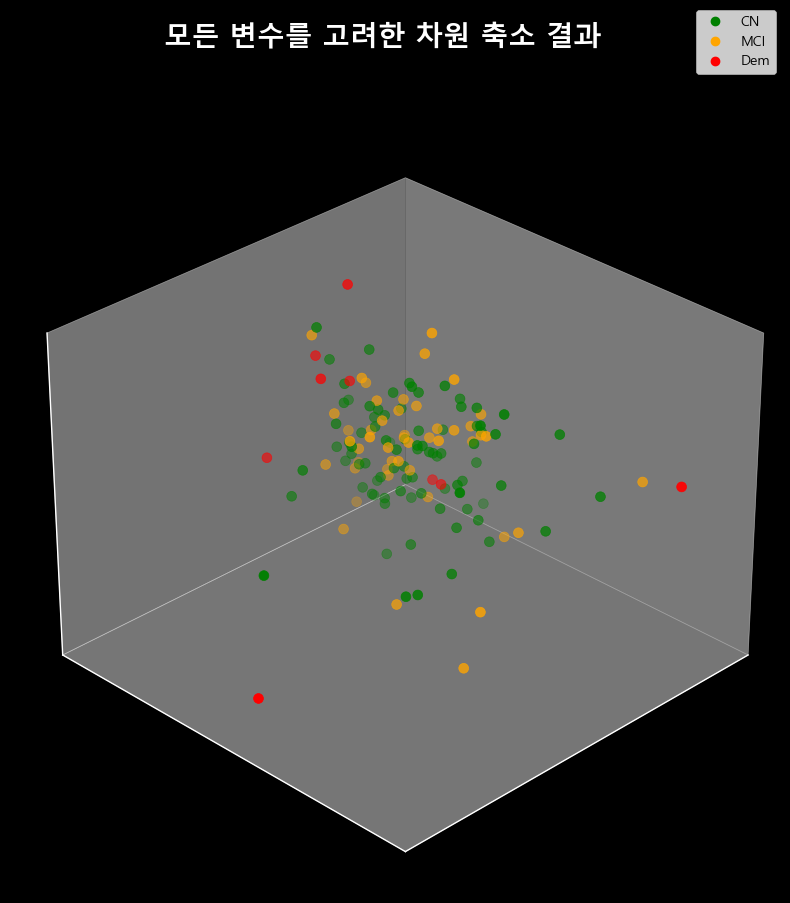

In [253]:
target_colors = {'CN':'green', 'MCI':'orange','Dem':'red'}

cmap = full_pca['target'].map(target_colors)

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                for label, color in target_colors.items()]


fullfig,ax = plt.subplots(subplot_kw = {'projection':'3d'},
                    figsize= (10,10))
fullfig.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
fullfig.suptitle('모든 변수를 고려한 차원 축소 결과', fontsize = 20, color = 'white',weight = 'bold')

fullfig.legend(handles = legend_elements,
        frameon = True,
        facecolor = 'white',
        bbox_to_anchor = (0.9,1),
        )

ax.view_init(30,45)
ax.scatter(full_pca[0],full_pca[1],full_pca[2], color = cmap, s = 50)


def full_update(i):

    cmap = full_pca['target'].map({'CN':'green','MCI':'orange','Dem':'red'})
        
    ax.view_init(30, i)
    scatter = ax.scatter(full_pca[0], full_pca[1], full_pca[2], s=30, color=cmap, alpha=0.5)
    return scatter,

In [254]:
ani = mpl.animation.FuncAnimation(fullfig, full_update, frames=range(0, 360, 10), repeat=True)
writer = PillowWriter(fps=5)
ani.save("full_pca.gif", writer=writer)

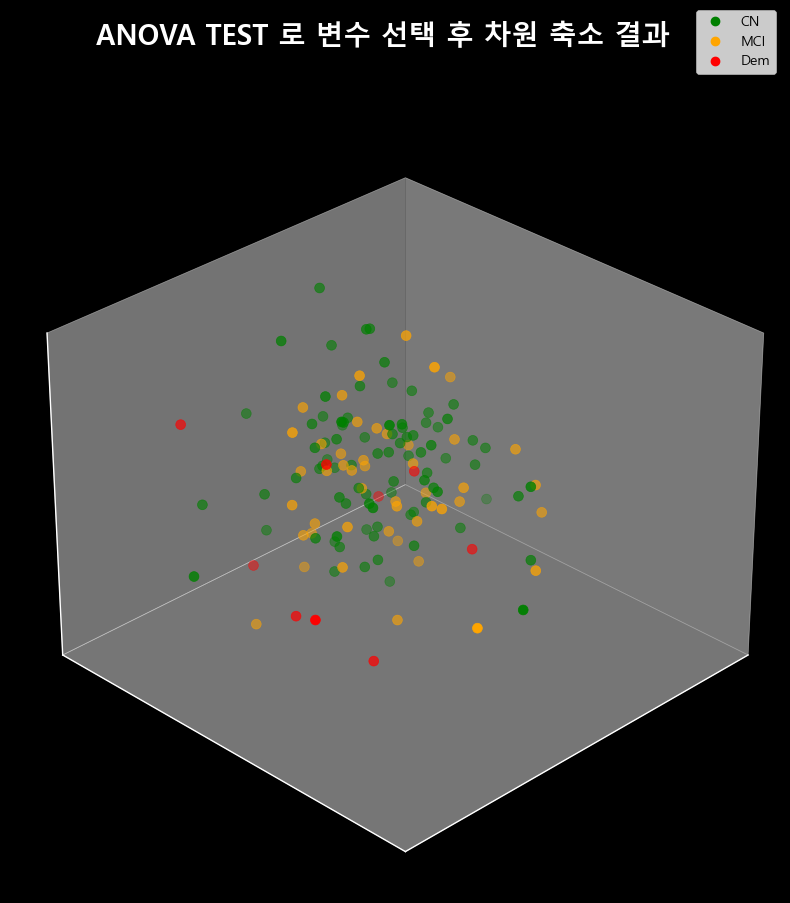

In [255]:
target_colors = {'CN':'green', 'MCI':'orange','Dem':'red'}

cmap = anova_pca['target'].map(target_colors)

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                for label, color in target_colors.items()]


anova_fig,ax = plt.subplots(subplot_kw = {'projection':'3d'},
                        figsize= (10,10))
anova_fig.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
anova_fig.suptitle('ANOVA TEST 로 변수 선택 후 차원 축소 결과', fontsize = 20, color = 'white',weight = 'bold')

anova_fig.legend(handles = legend_elements,
        frameon = True,
        facecolor = 'white',
        bbox_to_anchor = (0.9,1),
        )

ax.view_init(30,45)
ax.scatter(anova_pca[0],anova_pca[1],anova_pca[2], color = cmap, s = 50)


def anova_update(i):
                
        cmap = anova_pca['target'].map({'CN':'green','MCI':'orange','Dem':'red'})
                
        ax.view_init(30, i)
        scatter = ax.scatter(anova_pca[0], anova_pca[1], anova_pca[2], s=30, color=cmap, alpha=0.5)
        return scatter,

In [256]:
ani = mpl.animation.FuncAnimation(anova_fig, anova_update, frames=range(0, 360, 10), repeat=True)
writer = PillowWriter(fps=5)
ani.save("anova_pca.gif", writer=writer)

# 최종 변수 선택 

* 그룹간의 차이가 유의미한 변수들을 가지고 변수를 선택하도록 하자 

In [257]:
print('사용 할 변수명은')
print(full_anova)

사용 할 변수명은
['activity_rest', 'activity_score_meet_daily_targets', 'activity_score', 'activity_low', 'sleep_light', 'sleep_score_latency', 'sleep_midpoint_time', 'sleep_duration', 'sleep_onset_latency', 'sleep_restless', 'sleep_score_alignment', 'sleep_total', 'sleep_score_deep', 'sleep_awake', 'target']


In [258]:
df = df[full_anova]

df.head()

,activity_rest,activity_score_meet_daily_targets,activity_score,activity_low,sleep_light,sleep_score_latency,sleep_midpoint_time,sleep_duration,sleep_onset_latency,sleep_restless,sleep_score_alignment,sleep_total,sleep_score_deep,sleep_awake,target
0,618.063492,18.793651,58.682540,146.428571,15489.047619,78.650794,15273.809524,30706.666667,706.190476,40.174603,74.809524,23543.809524,75.492063,7162.857143,MCI
1,521.247788,11.601770,54.522124,281.300885,16303.539823,83.973451,15127.699115,30115.752212,672.212389,29.300885,86.849558,28060.088496,89.345133,2055.663717,CN
2,434.086207,54.068966,65.758621,328.827586,12873.103448,76.965517,13555.344828,27499.655172,886.034483,33.758621,97.931034,20247.413793,61.517241,7252.241379,MCI
3,492.205882,92.147059,91.264706,343.852941,14918.382353,82.500000,14254.852941,28521.176471,595.147059,45.867647,94.764706,21879.264706,76.867647,6641.911765,MCI
4,493.057143,72.542857,79.000000,326.485714,14088.000000,74.800000,14404.285714,28422.857143,578.571429,33.571429,89.028571,23275.714286,96.542857,5147.142857,CN


* 선택한 변수끼리의 상관 관계

In [259]:
cmap = sns.diverging_palette(250,10, as_cmap = True)

boundary = np.array(np.arange(-1,1,0.2))

norm = mpl.colors.BoundaryNorm(boundary, cmap.N)

<AxesSubplot:>

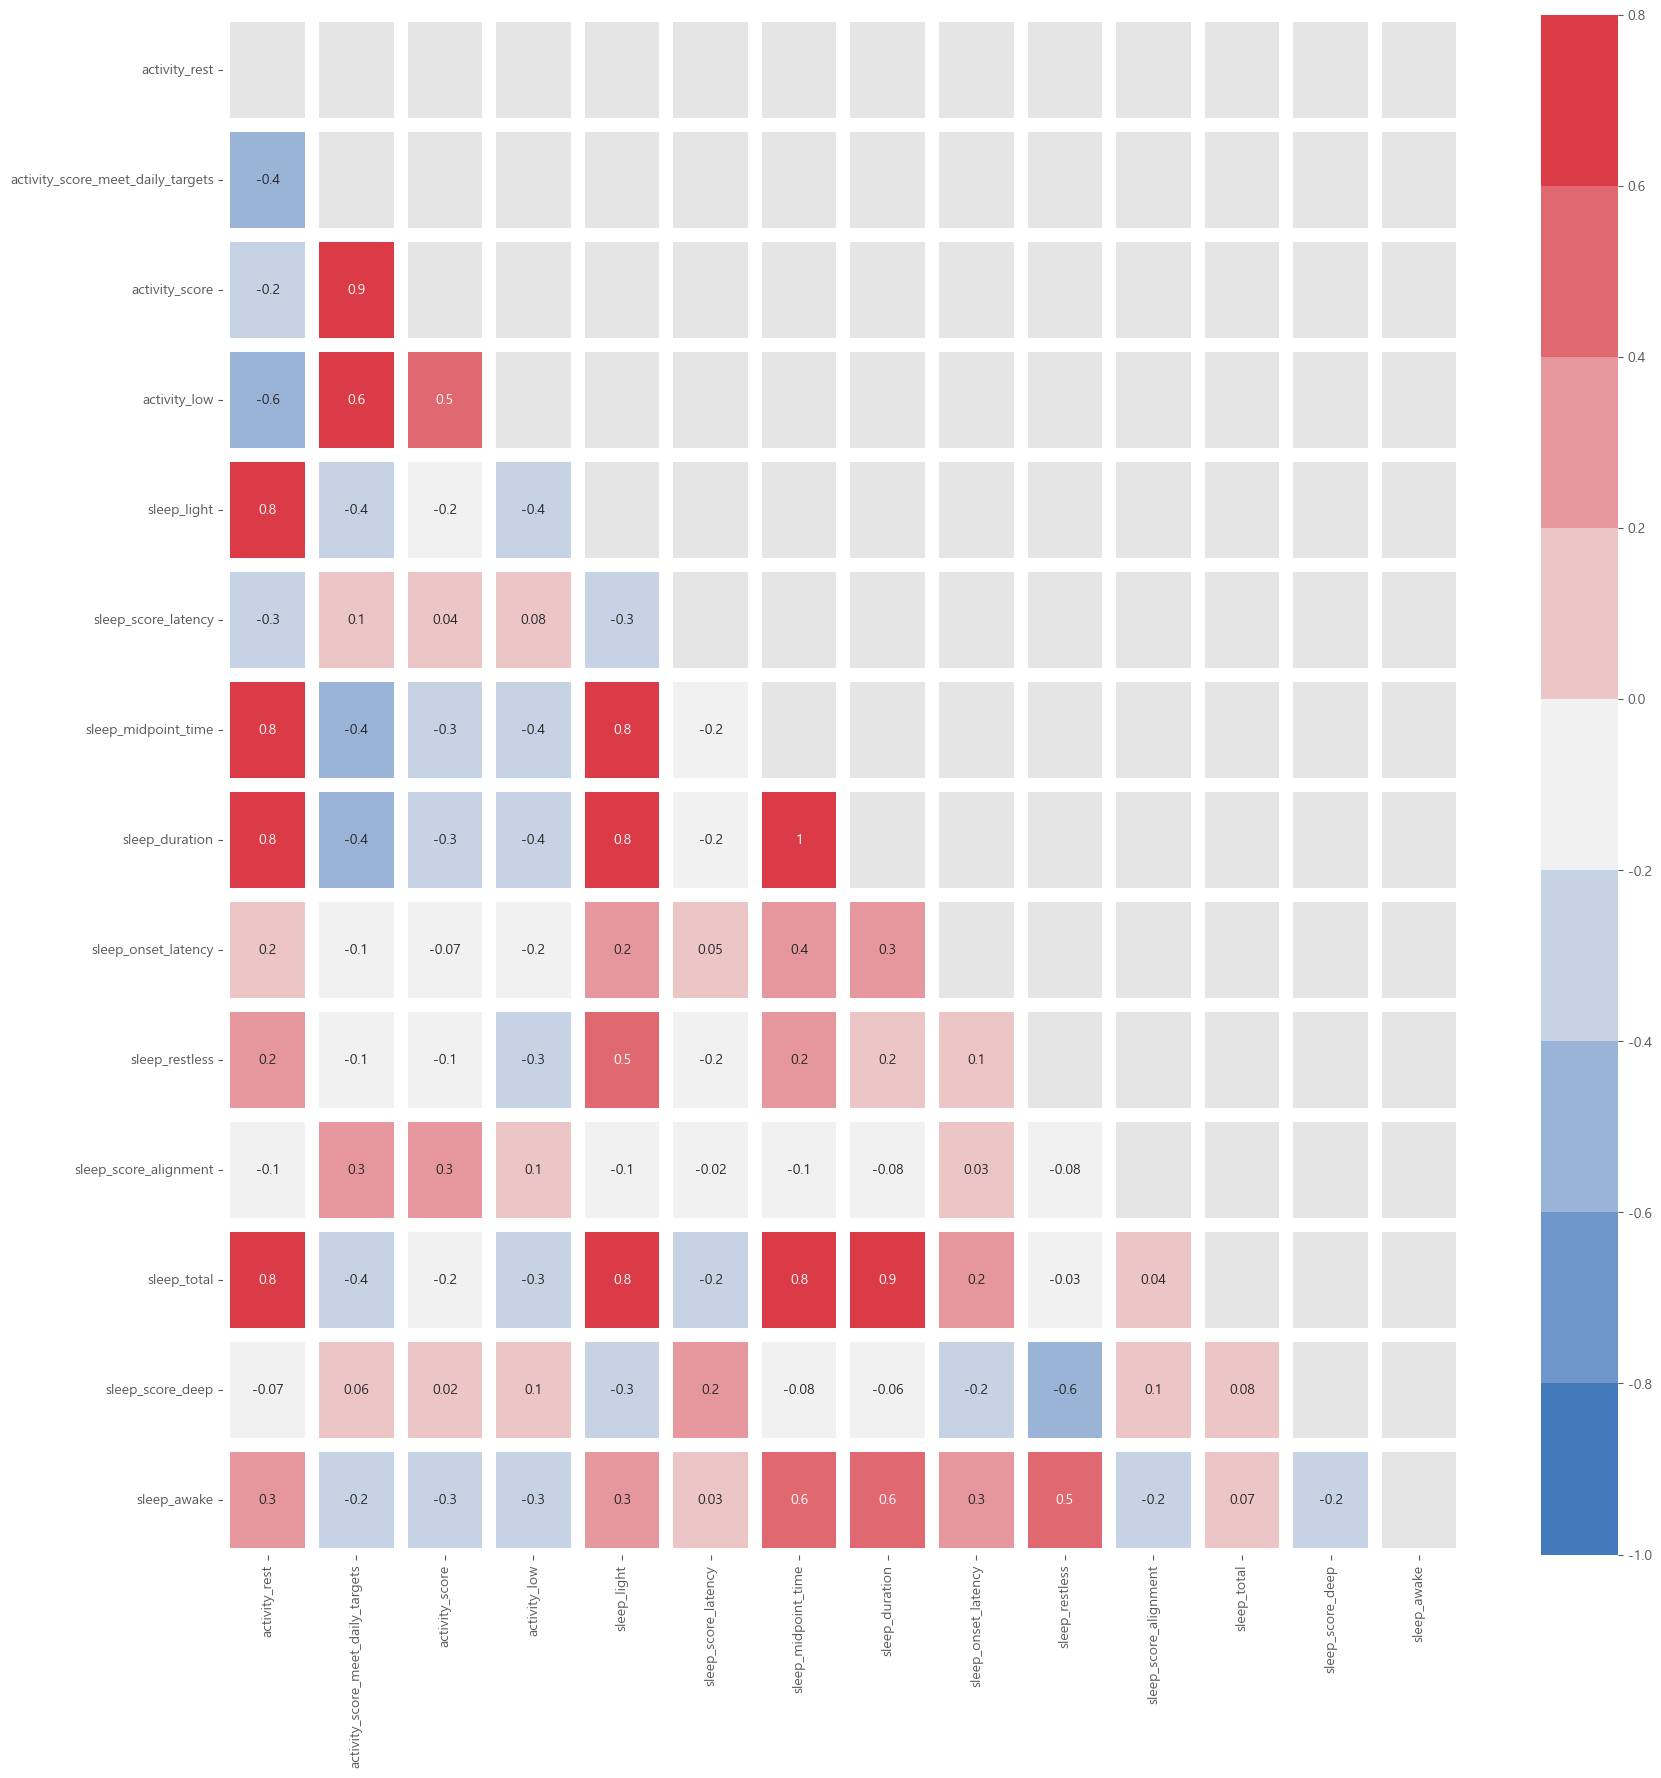

In [260]:
corr = df.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize = (20,20))

sns.heatmap(corr, mask = mask, annot = True, fmt = '.1g', 
                cmap = cmap , norm = norm, linewidths = 10)

<aside>
💡 INSIGHT

1. **비 활동성 시간** (acitivity rest)이 많을 수록 **수면 시간** (sleep total) 이 높았습니다. (상관 관계 0.8)
대상자들의 주 비활동성 시간은 수면 시간인 것으로 보입니다.

2. **수면 시간**(sleep duration) 과 **수면 중간점 시간** (sleep_midpoint_time)은 매우 유사한 변수로 보입니다. 두 변수 간의 상관관계는 약 1이며, 타 독립 변수들간의 상관관계도 유사합니다.
두 변수 모두 anova test 시 p-value 가 0.00 이하임으로 해석하기 어려운 **수면 중간점 시간**은 제외하고 모델링 해야겠습니다.

</aside>

In [261]:
df = df.drop('sleep_midpoint_time',axis = 1)

### 상관관계 높은 변수들끼리 회귀 플롯

In [262]:
corr = df.corr()
m = len(corr)

cols = []
indexes = []

for i in range(1,m):
    for j in range(i):
        
        if np.abs(corr.iloc[i,j]) > 0.7:
            cols.append(corr.columns[j])
            indexes.append(corr.index[i]) # 상관관계가 -0.7 이하, 0.7 이상인 경우의 인덱스과 컬럼을 리스트 형태로 저장 

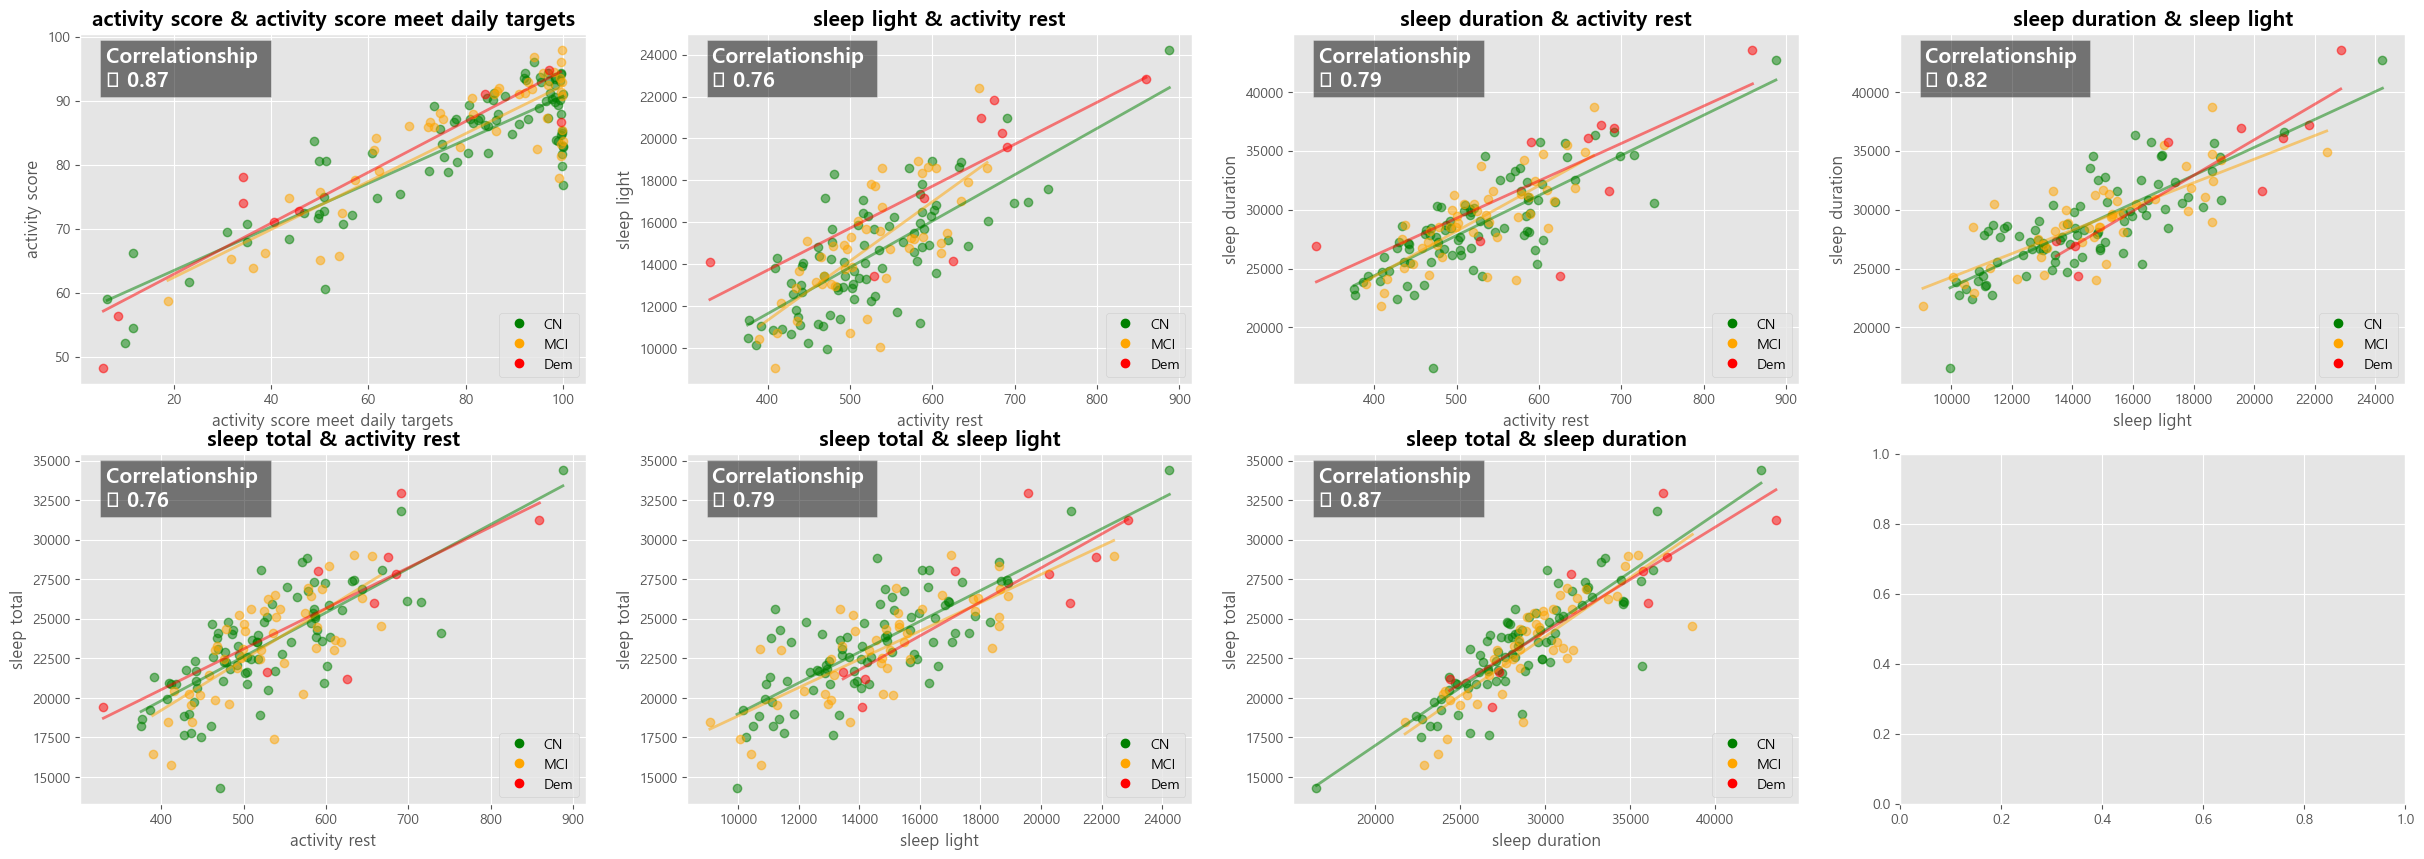

In [263]:
target_colors = {'CN':'green','MCI':'orange','Dem':'red'}

fig,ax = plt.subplots(ncols = 4, nrows = 2, figsize = (30,10))

ax = ax.flatten()

for i,(idx,col) in enumerate(zip(cols,indexes)):
    
    cor = round(df[[idx,col]].corr().iloc[0,1],2)
    
    for hue,color in target_colors.items():
        
        sns.regplot(data = df[df['target'] == hue],
                    x = idx,
                    y = col,
                    color = color,
                    scatter_kws = {'alpha':0.5},
                    line_kws = {'alpha':0.5, 'linewidth':2},
                    ax = ax[i],
                    ci = None)
        
    idx = idx.replace('_',' ')
    col = col.replace('_',' ')
    ax[i].text(0.05,0.85,f'Correlationship \n\t {cor}',transform = ax[i].transAxes, size = 15,
                color = 'white',fontweight = 'bold',bbox=dict(facecolor='black', alpha=0.5))
    ax[i].set_title(f'{col} & {idx}', size = 15, weight = 'bold')
    ax[i].set_ylabel(col)
    ax[i].set_xlabel(idx)
    handles = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle='') 
            for label, color in target_colors.items()]
    ax[i].legend(handles=handles, loc='lower right')

<aside>
💡 INSIGHT

이전 상관관계표에서 봤던 독립 변수들은 비치매군, 경도인지장애군, 치매군 모두 상관관계가 동일하게 높은 모습을 볼 수 있습니다.

</aside>

# 모델링

### 평가 지표 설정 

- F1 micro는 모든 클래스를 하나의 큰 클래스로 보고 계산하는 방식입니다. 
- 즉, 모든 클래스의 TP, FP, FN을 더해서 전체적인 정밀도(precision)와 재현율(recall)을 계산합니다.
- 따라서, F1 micro는 모든 클래스의 샘플을 하나의 큰 풀(pool)로 묶어서 계산하므로 데이터의 불균형이 존재할 때 유용합니다.

* 모델링 전 데이터 전처리 

In [264]:
def preprocessing(df):
    
    X = df.drop('target',axis = 1)
    
    Y = df['target']
    
    Y = Y.map({'CN':0,'MCI':1,'Dem':2})
    
    for col in X.columns:
        
        min_col = np.min(X[col])
        max_col = np.max(X[col])
        
        X[col] = X[col].map(lambda x: (x - min_col)/(max_col - min_col)) # min_max_scaling
        
    return X,Y

In [352]:
test = pd.read_csv('https://raw.githubusercontent.com/yonghyeun/Dementia_Analysis/main/data/test.csv').drop('EMAIL',axis = 1)

test = test[['activity_rest', 'activity_score_meet_daily_targets', 'activity_score', 'activity_low',
                'sleep_light', 'sleep_score_latency', 'sleep_duration', 'sleep_onset_latency', 'sleep_restless',
                'sleep_score_alignment', 'sleep_total', 'sleep_score_deep', 'sleep_awake', 'target']] # ANOVA TEST로 정한 feature 와 중복되는 변수를 제외한 15가지의 변수 선택

In [353]:
X,Y = preprocessing(df)

x_test,y_test = preprocessing(test)

In [354]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

x_train,x_valid,y_train,y_valid = train_test_split(X,Y,stratify = Y,
                                                    random_state = 42,test_size = 0.2)

## 화이트박스 모델 

### 로지스틱 회귀분석

In [267]:
from sklearn.linear_model import LogisticRegression

params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
}


logist_grid = GridSearchCV(estimator = LogisticRegression(),param_grid = params, cv = 10, scoring = 'f1_micro')
logist_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 500, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_micro')

In [268]:
models = {}
scores = {}

models['Logistic Regression'] = logist_grid.best_estimator_
scores['Logistic Regression'] = logist_grid.best_score_

print('최적의 하이퍼 파라미터 : ',logist_grid.best_params_)

최적의 하이퍼 파라미터 :  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}


### 의사결정나무

In [269]:
from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 5, 10,25],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']}

dt_grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params,cv = 10, scoring = 'f1_micro')

dt_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 25],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [270]:
models['Decision Tree'] = dt_grid.best_estimator_
scores['Decision Tree'] = dt_grid.best_score_

print('최적의 하이퍼 파라미터 : ',dt_grid.best_params_)

최적의 하이퍼 파라미터 :  {'criterion': 'gini', 'max_depth': 25, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}


### 서포트벡터머신

In [271]:
from sklearn.svm import SVC

params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4],
}

svc_grid = GridSearchCV(estimator = SVC(), param_grid = params, cv = 10, scoring = 'f1_micro')
svc_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_micro')

In [272]:
models['SVC'] = svc_grid.best_estimator_
scores['SVC'] = svc_grid.best_score_

print('최적의 하이퍼 파라미터 : ',svc_grid.best_params_)

최적의 하이퍼 파라미터 :  {'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


### KNN

In [273]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, cv = 10, scoring = 'f1_micro')
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1_micro')

In [274]:
models['KNN'] = knn_grid.best_estimator_
scores['KNN'] = knn_grid.best_score_

print('최적의 하이퍼 파라미터 : ',knn_grid.best_params_)

최적의 하이퍼 파라미터 :  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


# 화이트 박스 모델들의 ROC curve

In [275]:
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

In [276]:
from sklearn.preprocessing import label_binarize

* validation data 와 test data 모두 평가하자 

In [339]:
def avg_roc_curve(models,TEST_FEATURE,TEST_LABEL,ADD_TITLE):
    
    fig,ax = plt.subplots(figsize = (8,8))
    
    real = label_binarize(TEST_LABEL, classes = [0,1,2]) # 다중 범주 문제를 roc_curve 로 그리기 위해 encoding
                                                    # 각 클래스 별 ROC curve를 그리게 된다.
    n = 3 # classes 의 unqiue 한 갯수                                                
    
    
    for num,(name,model) in enumerate(models.items()):
        
        if name == 'SVC':
            
            model = CalibratedClassifierCV(model) #SVC는 predict_proba 를 제공하지 않으므로 상속시킨 모델을 만들자
            
            model.fit(x_train,y_train)
            
            prob = model.predict_proba(TEST_FEATURE)
            
            fpr = {}
            tpr = {}
            
            fpr['micro'],tpr['micro'] , _ = roc_curve(real.ravel(), prob.ravel())
            AUC = round(auc(fpr['micro'], tpr['micro']),2)
            
            ax.plot(fpr['micro'],tpr['micro'], label = f'{name} \n AUC : {AUC}')
            
        else:
                        
            prob = model.predict_proba(TEST_FEATURE)
            
            fpr = {}
            tpr = {}

            fpr['micro'],tpr['micro'] , _ = roc_curve(real.ravel(), prob.ravel())
            AUC = round(auc(fpr['micro'], tpr['micro']),2)
            
            ax.plot(fpr['micro'],tpr['micro'], label = f'{name} \n AUC : {AUC}')
            
    ax.plot([0,1],[0,1], c = 'k', ls ='--', lw = '2')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'화이트 박스 모델 별 ROC CURVE \n ({ADD_TITLE})')
        
    ax.legend(loc = 'lower right')

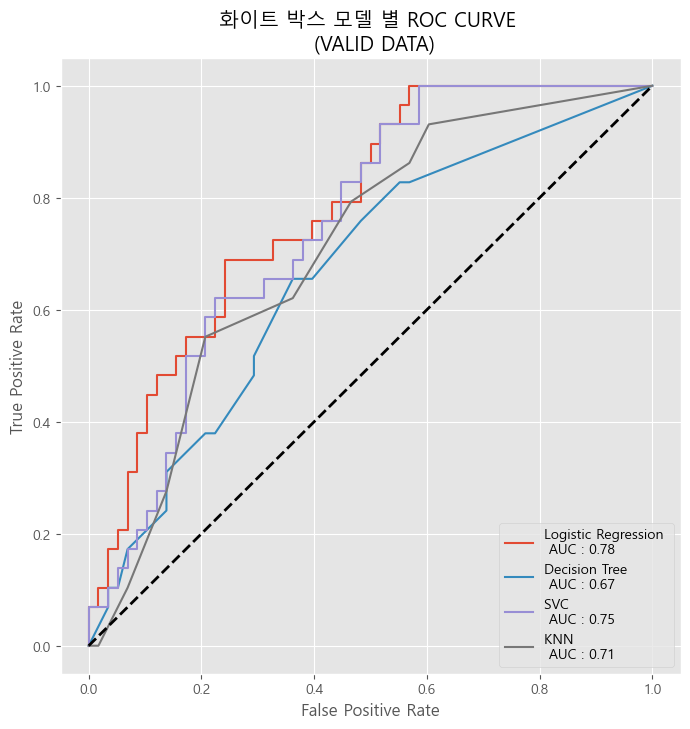

In [341]:
avg_roc_curve(models,x_valid,y_valid, 'VALID DATA')

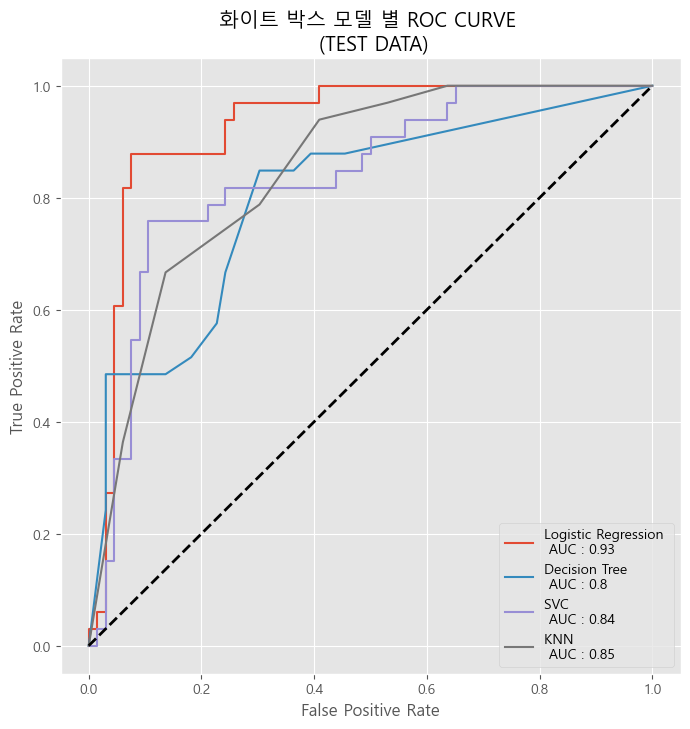

In [355]:
avg_roc_curve(models,x_test,y_test, 'TEST DATA')

### 화이트 박스 모델의 클래스 별 ROC CURVE

In [337]:
def roc_curve_plot(models,TEST_FEATURE,TEST_LABEL, ADD_TITLE):
    
    fig,ax = plt.subplots(ncols = len(models), figsize = (20,5))
    
    real = label_binarize(TEST_LABEL, classes = [0,1,2]) # 다중 범주 문제를 roc_curve 로 그리기 위해 encoding
                                                    # 각 클래스 별 ROC curve를 그리게 된다.
    n = 3 # classes 의 unqiue 한 갯수                                                
    
    
    for num,(name,model) in enumerate(models.items()):
        
        if name == 'SVC':
            
            model = CalibratedClassifierCV(model) #SVC는 predict_proba 를 제공하지 않으므로 상속시킨 모델을 만들자
            
            model.fit(x_train,y_train)
            
            prob = model.predict_proba(TEST_FEATURE)
            
            fpr = {}
            tpr = {}
            AUC = {}
            labels = {0:'CN',1:'MCI',2:'Dem'}
            
            for i in range(n):
                
                fpr[i],tpr[i],_ = roc_curve(real[:,i], prob[:,i])
                
                AUC[i] = round(auc(fpr[i],tpr[i]),2)
                
                ax[num].plot(fpr[i],tpr[i], label = f'{labels[i]} \n AUC : {AUC[i]}')
                
                ax[num].plot([0,1],[0,1], ls = '--', c = 'k', lw = '0.5')
                ax[num].set_title(name)
                ax[num].legend(loc = 'lower right')
                
                
            
        else:
                        
            prob = model.predict_proba(TEST_FEATURE)
            
            fpr = {}
            tpr = {}
            AUC = {}
            labels = {0:'CN',1:'MCI',2:'Dem'}
            
            for i in range(n):
                
                fpr[i],tpr[i],_ = roc_curve(real[:,i], prob[:,i])
                
                AUC[i] = round(auc(fpr[i],tpr[i]),2)
                
                ax[num].plot(fpr[i],tpr[i], label = f'{labels[i]} \n AUC : {AUC[i]}')
                
        
        ax[num].plot([0,1],[0,1], ls = '--', c = 'k', lw = '0.5')
        ax[num].legend(loc = 'lower right')
        ax[num].set_title(f'{name}의 class 별 ROC curve\n ({ADD_TITLE})')
        ax[num].set_xlabel('False Positive Rate')
        ax[num].set_ylabel('True Positive Rate')
        

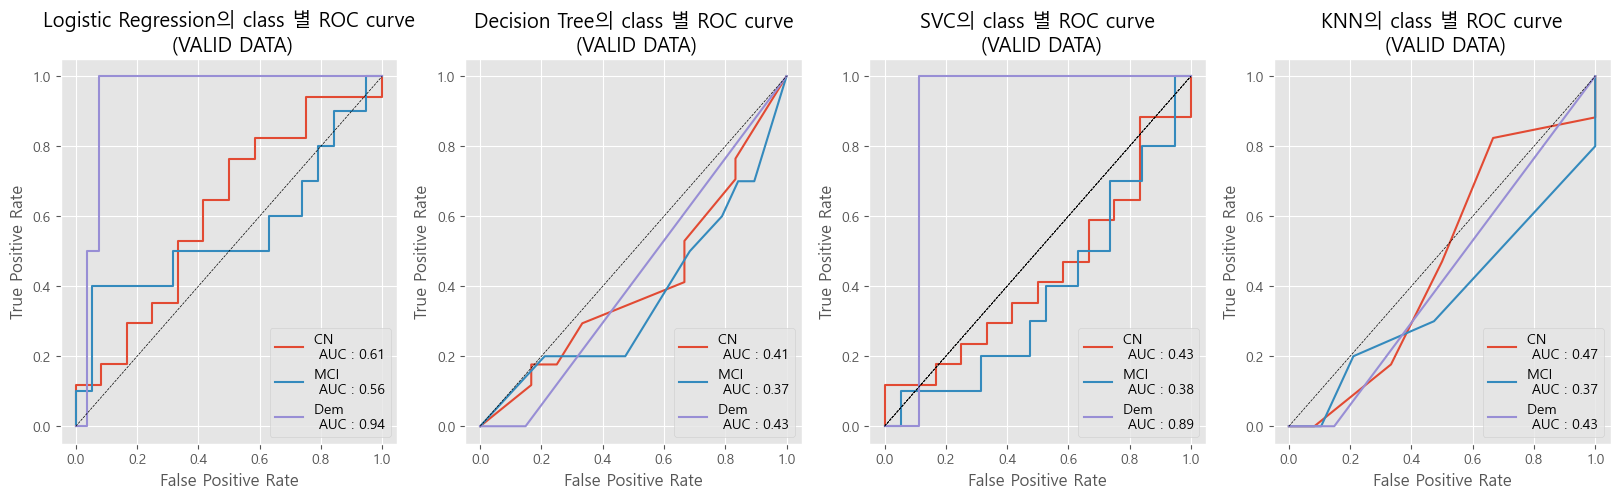

In [338]:
roc_curve_plot(models,x_valid,y_valid,'VALID DATA')

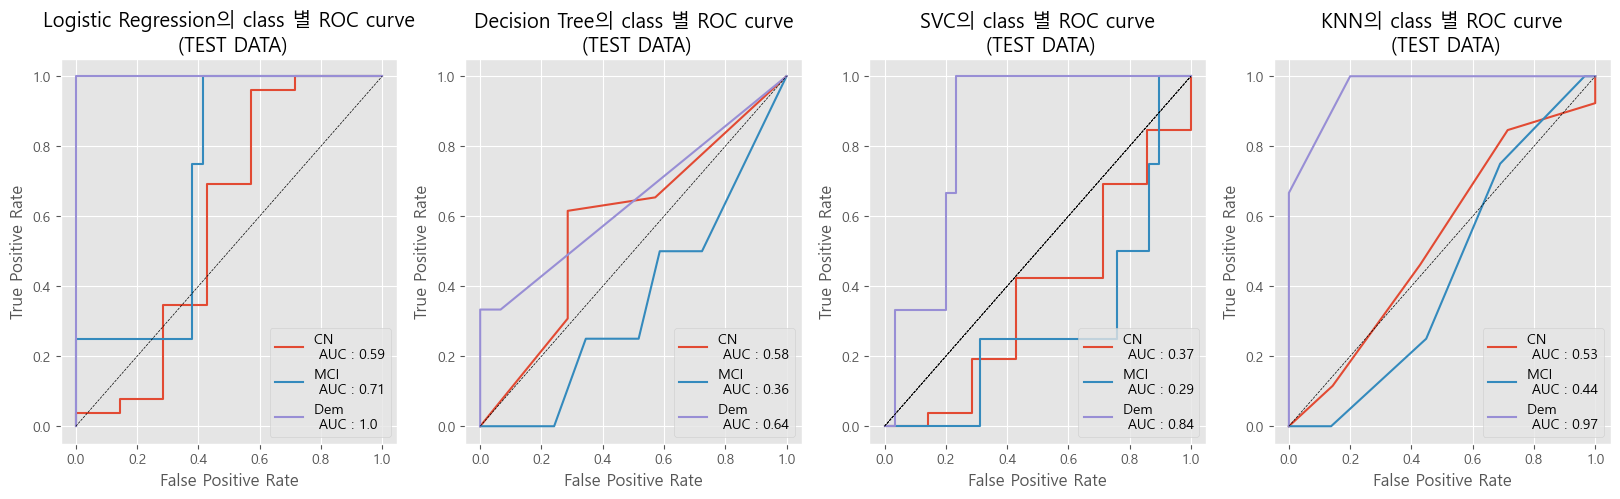

In [357]:
roc_curve_plot(models,x_test,y_test,'TEST DATA')

In [364]:
y_valid.value_counts()

0    17
1    10
2     2
Name: target, dtype: int64

In [365]:
y_test.value_counts()

0    26
1     4
2     3
Name: target, dtype: int64